# Generate paper figures

In [1]:
suppressPackageStartupMessages({
    library(Seurat)
    library(dplyr)
    library(data.table)
    library(ggplot2)
    library(patchwork)
    library(harmony)
    library(entropy)
    library(presto)
    library(singlecellmethods)
    library(lme4)
    library(purrr)
    library(pheatmap)
    library(rcna)
    library(glue)
    library(ggthemes)
    library(ggpubr)
    library(ggrastr)
    library(Hmisc)
    library(grid)

})

source("utils.r")
source("myfun.r")

In [3]:
sessionInfo()

R version 4.2.3 (2023-03-15)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /PHShome/stg20/.conda/envs/Renv/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] Hmisc_5.2-1             ggrastr_1.0.2           ggpubr_0.6.0           
 [4] ggthemes_5.1.0          glue_1.8.0              rcna_0.0.99            
 [7] pheatmap_1.0.12         purrr_1.0.2             lme4_1.1-35.5          
[10] Matrix_1.6-4            singlecellmethods_0.1.0 presto_

In [2]:
saving.path <- "/data/brennerlab/Shani/projects/Treg/analysis/integrated/"
treg.path <- paste0(saving.path, "integrated.Tregs.rds")

In [3]:
merged <- readRDS(treg.path)

In [4]:
table(merged$orig.ident, merged$tissue)

        
         HD.Blood RA.Blood RA.Syn.Fluid RA.Syn.Tissue
  AMP2          0        0            0          4512
  AMPrep        0     1003            0          1896
  HD_Luo     7026        0            0             0
  SF.BL         0     2809         1663             0

In [5]:
merged$cell.states <- factor(merged$cell.states, levels = ordered.levels)

In [6]:
merged$tissue%>% unique()

[1] RA.Syn.Tissue RA.Blood      RA.Syn.Fluid  HD.Blood     
Levels: HD.Blood RA.Blood RA.Syn.Fluid RA.Syn.Tissue

## Figure 1

### Figure 1A

Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


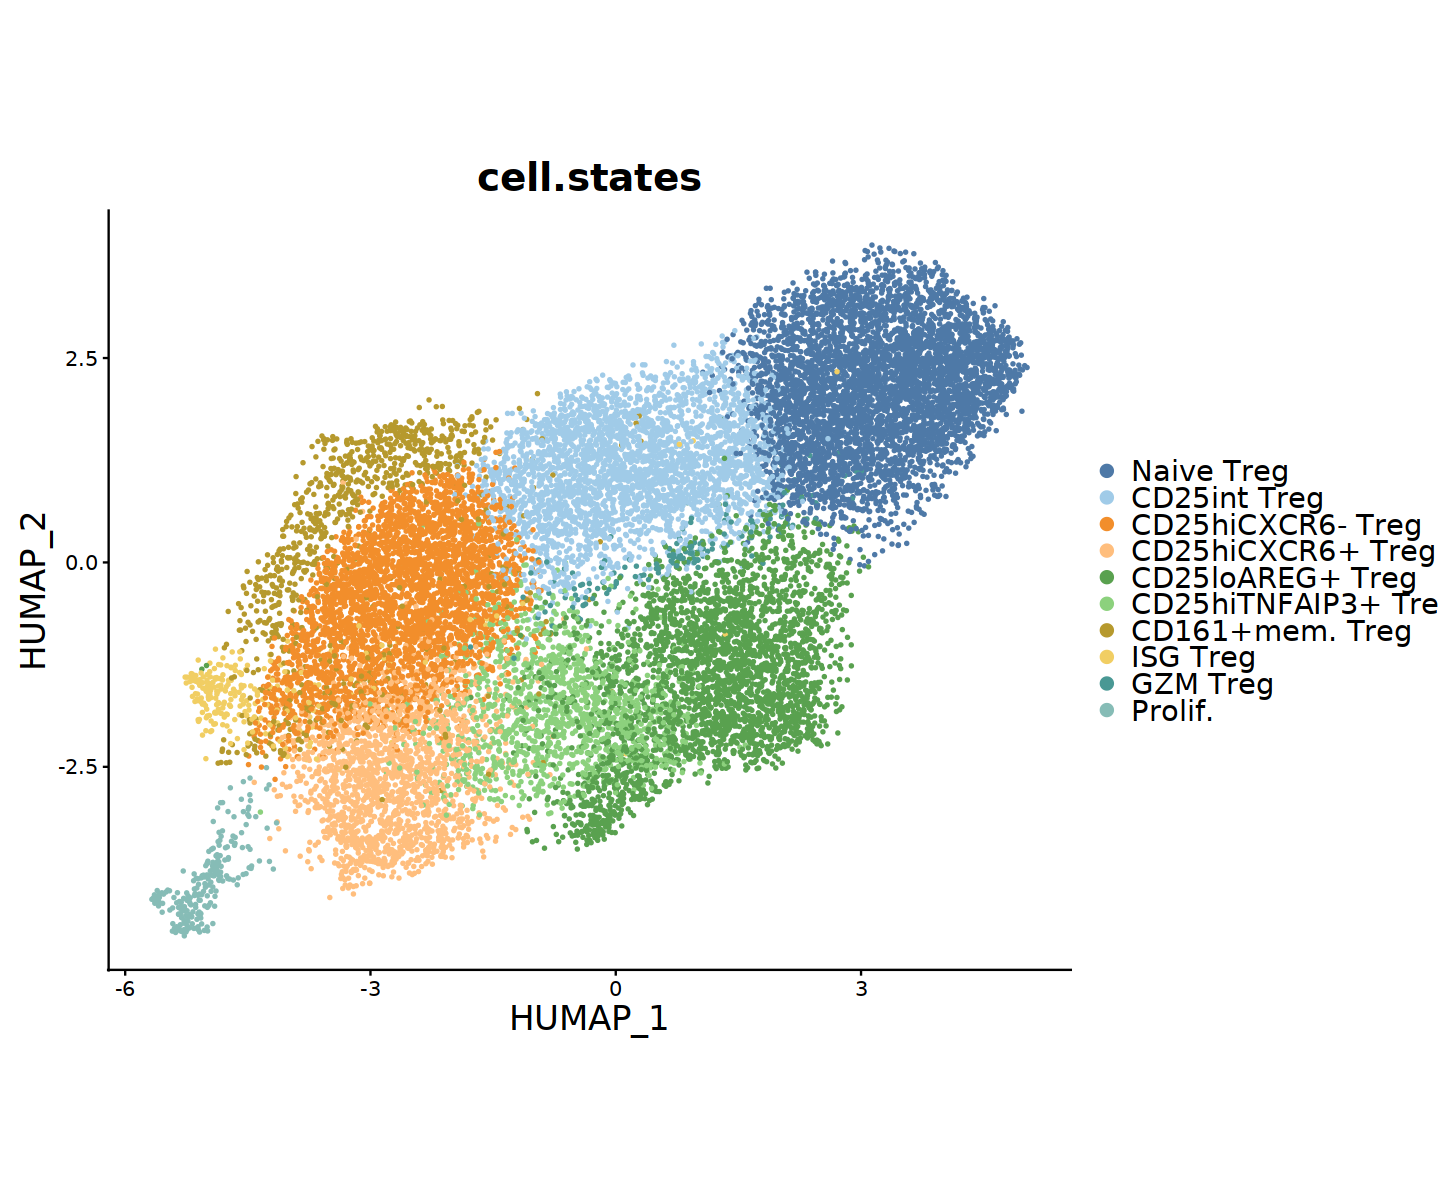

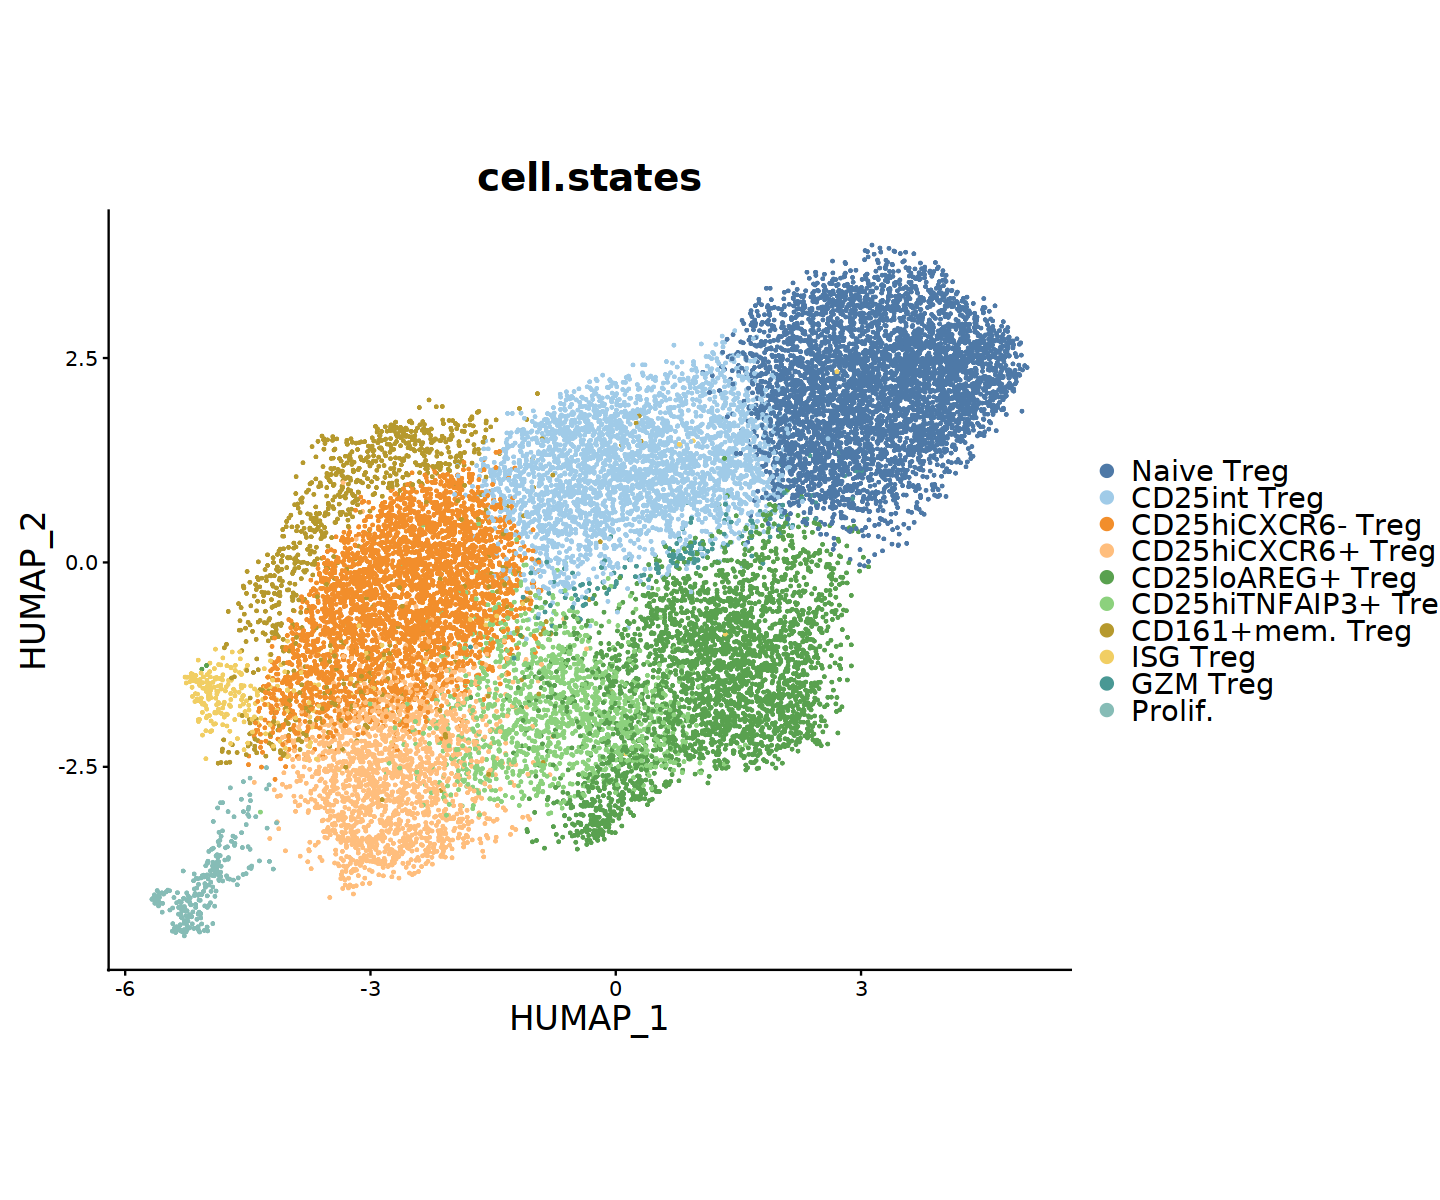

In [8]:
# Figure 1A

fig.size(10,12)
pdf(file = paste(saving.path, "Figures/Fig1A.ClusterUMAP.noLabels.pdf", sep = ''),
    width = 12, 
    height = 10)
# Idents(merged) <- "cell.states"
f1a <- DimPlot(merged, group.by = "cell.states", label = F, label.box = T, 
        shuffle = T, label.size = 5, pt.size = 0.5) + 
    theme(text = element_text(size = 20)) + scale_fill_manual(values = cell.state.colors$cell.states) +
    scale_color_manual(values = cell.state.colors$cell.states) + coord_fixed()
f1a
dev.off()
f1a

rasterize(f1a, dpi = 300)

### Figure 1B

pdf 
  2

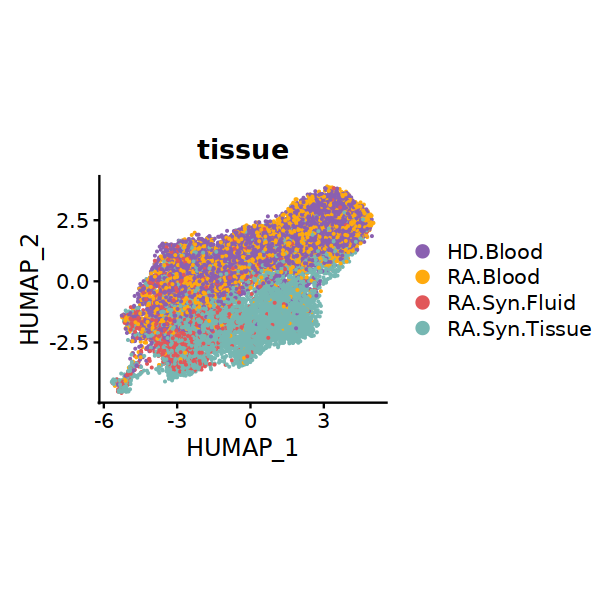

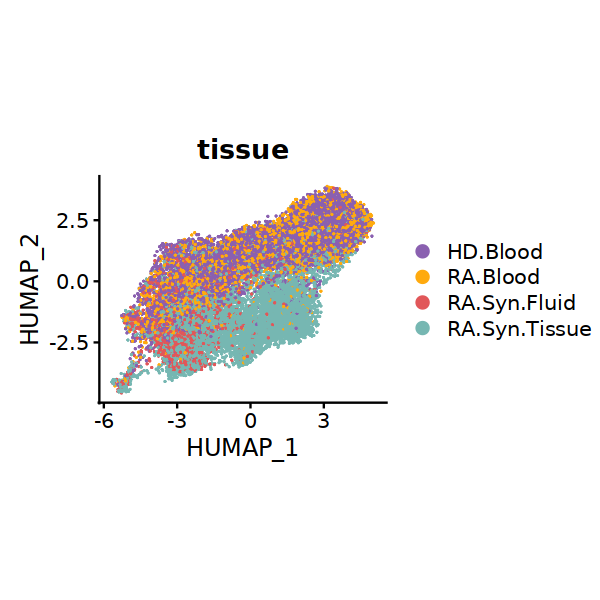

In [10]:
# Figure 1B

fig.size(5,5)
pdf(file = paste(saving.path, "Figures/Fig1B.TissuesUMAP.pdf", sep = ''),
    width = 5, 
    height = 5)

f1b <- DimPlot(merged, group.by = "tissue", label = F, label.box = F, #pt.size = 0.2,
        shuffle = T) + #, label.size = 5) + theme(text = element_text(size = 24)) + 
    scale_color_manual(values = cell.state.colors$tissue) + coord_fixed()
f1b
dev.off()
f1b
rasterize(f1b, dpi = 300)

### Figure 1C-1D

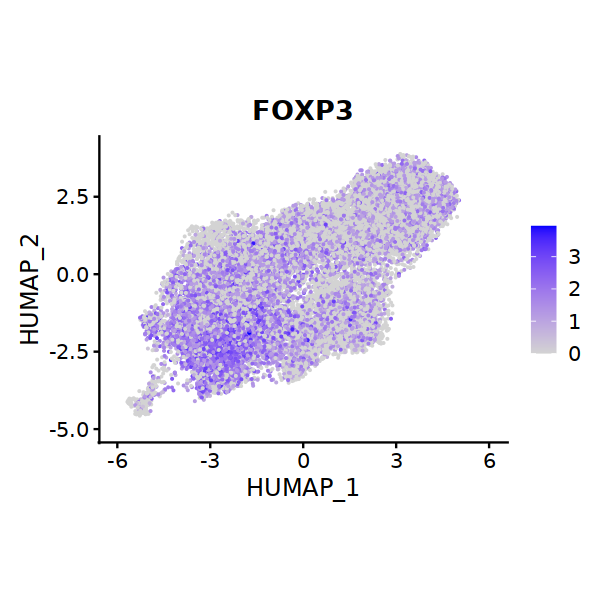

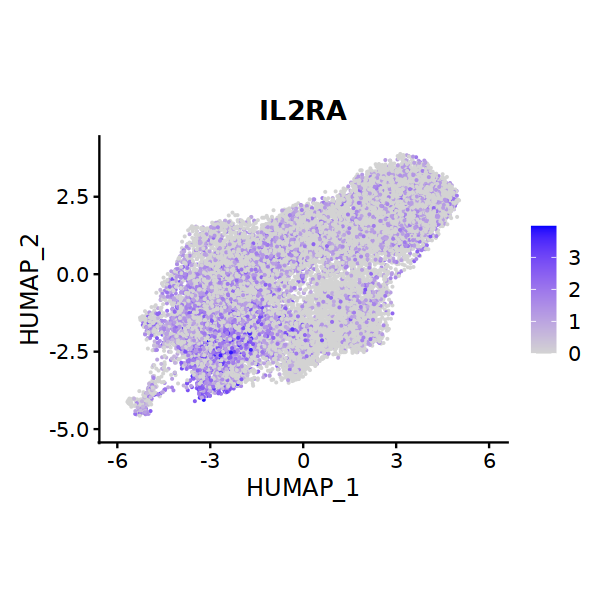

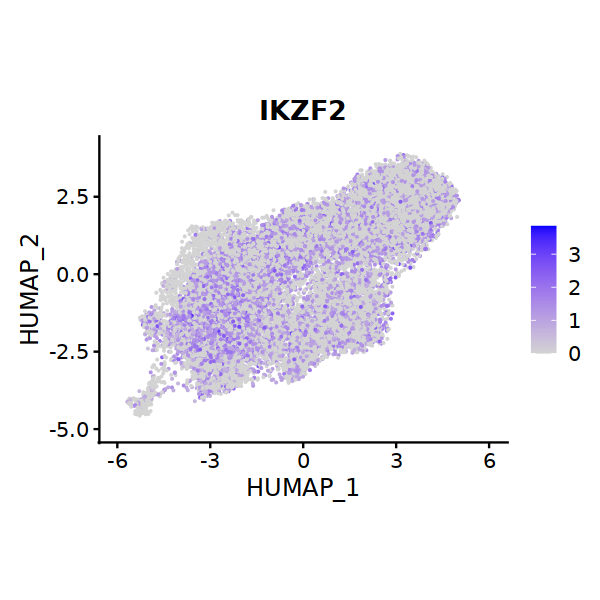

In [12]:
fig.size(5, 5)

gene.list.to.save <- c("FOXP3", "IL2RA" ,"IKZF2")

for (g in gene.list.to.save) {
pdf(file = paste(saving.path, "Figures/Fig1C.FeaturePlot.", g, ".pdf", sep = ''),
    width = 5, 
    height = 5)

dp <- FeaturePlot(merged, g) + coord_fixed()
print(dp)
dev.off()
print(dp)
} 

### figure 1E

pdf 
  2

pdf 
  2

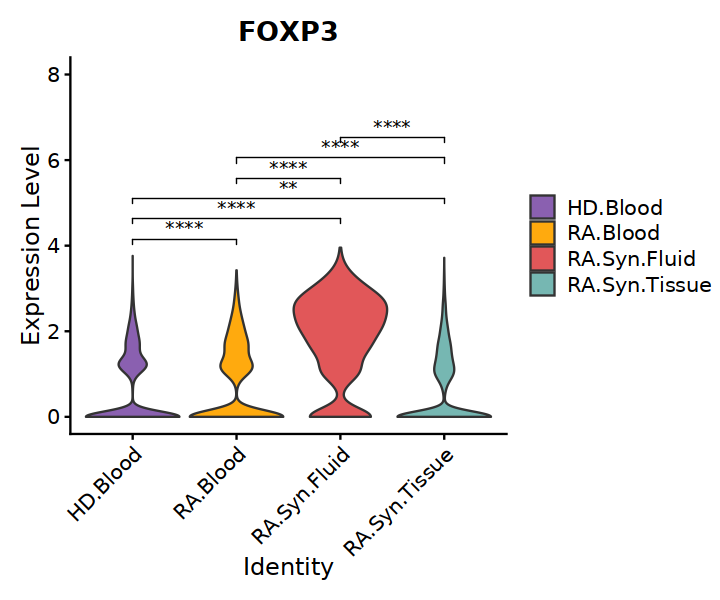

pdf 
  2

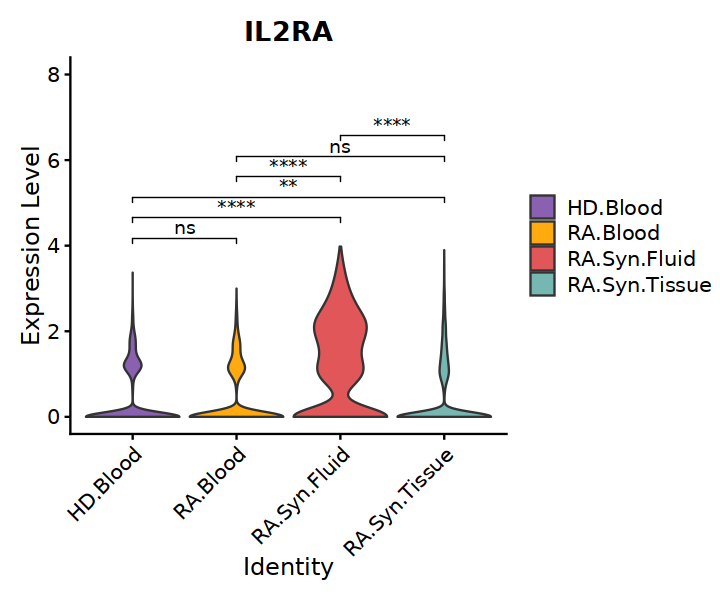

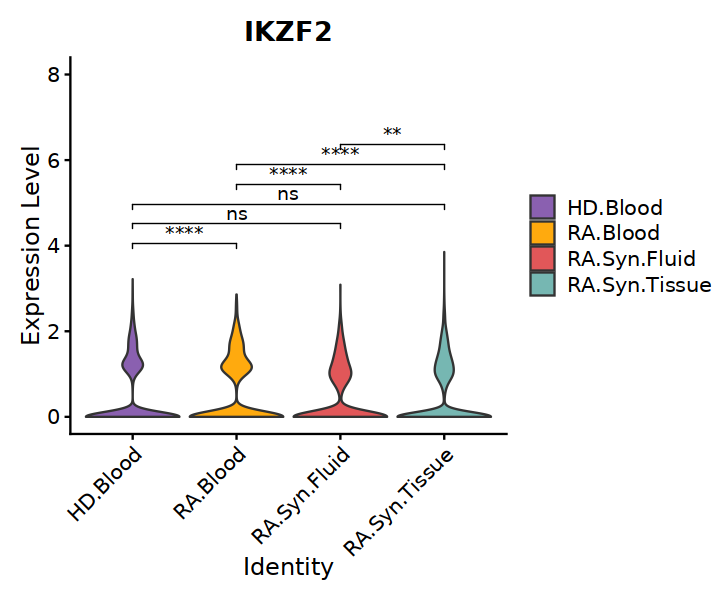

In [49]:
fig.size(5, 6)

pdf(file = paste(saving.path, "Figures/Fig1E.TissuesVln.FOXP3.wilcoxon.pdf", sep = ''),
    width = 6, 
    height = 5)
my_comparisons <- list( c("HD.Blood", "RA.Blood"),  c("HD.Blood", "RA.Syn.Fluid"), c("HD.Blood", "RA.Syn.Tissue"), c("RA.Blood", "RA.Syn.Fluid"),
                       c("RA.Blood", "RA.Syn.Tissue"), c("RA.Syn.Fluid", "RA.Syn.Tissue"))


dp <- VlnPlot(merged, "FOXP3",group.by = "tissue", cols = cell.state.colors$tissue, pt.size = 0, y.max = 8) + 
stat_compare_means(comparisons = my_comparisons, method = "wilcox.test", label = "p.signif", hide.ns = F)
dp
dev.off()
dp


pdf(file = paste(saving.path, "Figures/Fig1E.TissuesVln.IL2RA.wilcoxon.pdf", sep = ''),
    width = 6, 
    height = 5)

dp <- VlnPlot(merged, "IL2RA",group.by = "tissue", cols = cell.state.colors$tissue, pt.size = 0, y.max = 8) + 
stat_compare_means(comparisons = my_comparisons, method = "wilcox.test", label = "p.signif", hide.ns = F)
dp
dev.off()
dp

pdf(file = paste(saving.path, "Figures/Fig1E.TissuesVln.IKZF2.wilcoxon.pdf", sep = ''),
    width = 6, 
    height = 5)

dp <- VlnPlot(merged, "IKZF2",group.by = "tissue", cols = cell.state.colors$tissue, pt.size = 0, y.max = 8) + 
stat_compare_means(comparisons = my_comparisons, method = "wilcox.test", label = "p.signif", hide.ns = F)
dp
dev.off()
dp


### Figure 1G

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


pdf 
  2

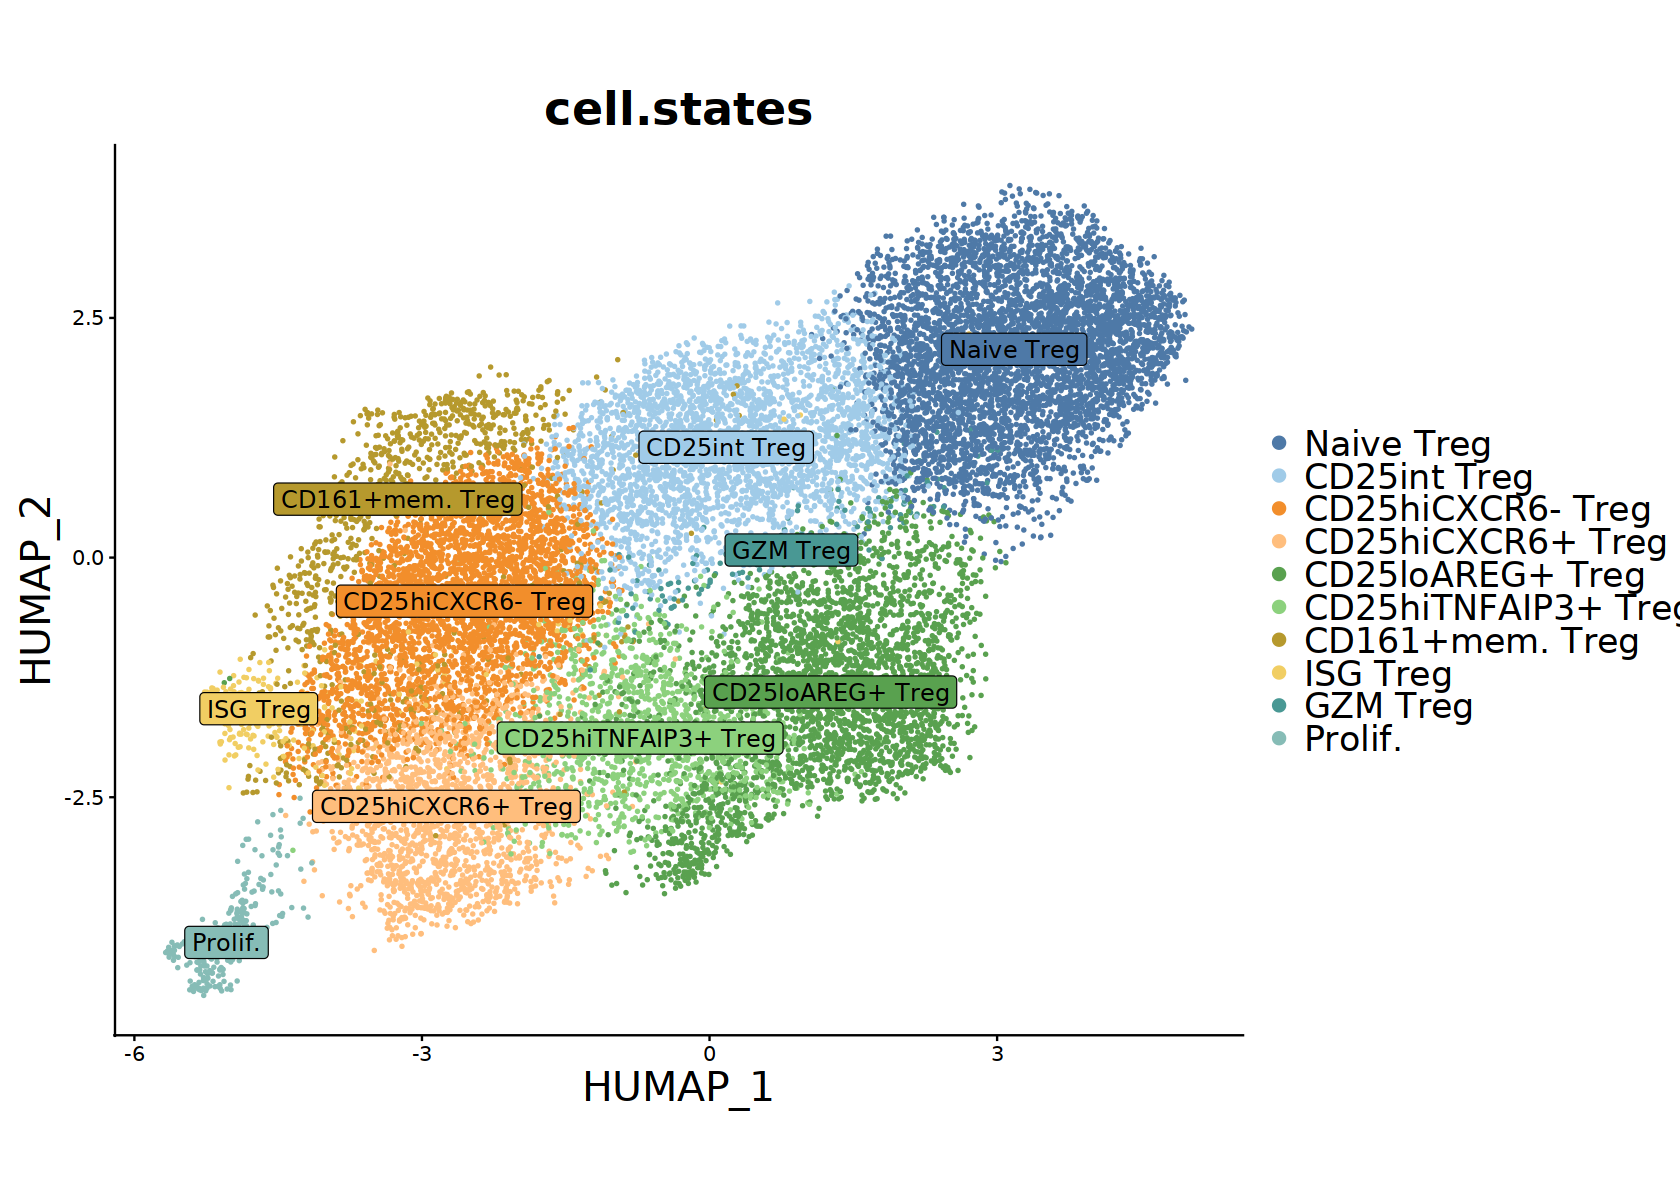

In [14]:
fig.size(10,14)
Idents(merged) <- "cell.states"

pdf(file = paste(saving.path, "Figures/Fig1G.ClustersUMAP.pdf", sep = ''),
    width = 12, 
    height = 10)

dp <- DimPlot(merged, group.by = "cell.states", label = T, label.box = T,
        shuffle = T, label.size = 5, pt.size = 0.5) + 
    theme(text = element_text(size = 24)) + scale_fill_manual(values = cell.state.colors$cell.states) +
    scale_color_manual(values = cell.state.colors$cell.states) + coord_fixed()
dp
dev.off()
dp


### Figure 1H, 1I

In [20]:
# Find in "Integrated.Tregs.Heatmaps.ipynb" notebook

### Figure 1J

In [21]:
sub.amp <- readRDS(paste0(saving.path, "Tissue_Treg_RA.rds"))

In [22]:
dp <- FetchData(sub.amp, cells = rownames(sub.amp@meta.data)[sub.amp$orig.ident == "AMP2"], 
                layer = "data", vars = c('CD45RA-prot','CD45RO-prot', "cell.states"))
dp <- dp %>% group_by(cell.states) %>% summarise_at(c('adt_CD45RA-prot','adt_CD45RO-prot'), mean) %>% 
mutate(ratio = `adt_CD45RA-prot`/`adt_CD45RO-prot`)

dp

Warning message:
“Could not find CD45RA-prot in the default search locations, found in ‘ADT’ assay instead”
Warning message:
“Could not find CD45RO-prot in the default search locations, found in ‘ADT’ assay instead”


cell.states         adt_CD45RA-prot adt_CD45RO-prot ratio    
1  Naive Treg          0.9851401       1.327350        0.7421855
2  CD25int Treg        0.8050670       1.698479        0.4739928
3  CD25hiCXCR6- Treg   0.6951406       2.022888        0.3436377
4  CD25hiCXCR6+ Treg   0.6391370       2.060499        0.3101855
5  CD25loAREG+ Treg    0.8883068       1.633048        0.5439564
6  CD25hiTNFAIP3+ Treg 0.7015889       2.025199        0.3464296
7  CD161+mem. Treg     0.7043651       1.972957        0.3570098
8  ISG Treg            0.6051598       2.128659        0.2842915
9  GZM Treg            1.1046898       1.728149        0.6392330
10 Prolif.             0.7550407       2.246372        0.3361156

In [25]:
fig.size(6,12)

gp <- ggplot(dp, aes(y= `adt_CD45RA-prot`, x = `adt_CD45RO-prot`, color = cell.states, fill = cell.states)) + geom_point(size = 6) +
ggrepel::geom_label_repel(data = subset(dp, cell.states %in% c('Naive Treg',
                                                            'CD25int Treg',
                                                            'CD25hiCXCR6- Treg',
                                                            'CD25hiCXCR6+ Treg',
                                                            'CD25loAREG+ Treg',
                                                            'CD25hiTNFAIP3+ Treg'
                                                            )), 
  aes(label = c('Naive Treg',
                'CD25int Treg',
                'CD25hiCXCR6- Treg',
                'CD25hiCXCR6+ Treg',
                'CD25loAREG+ Treg',
                'CD25hiTNFAIP3+ Treg'
                 )), nudge_y = 0.05, size = 6, color = "black") +  
scale_color_manual(values = cell.state.colors$cell.states) + 
scale_fill_manual(values = cell.state.colors$cell.states) +
theme_bw(base_size = 20)

pdf 
  2

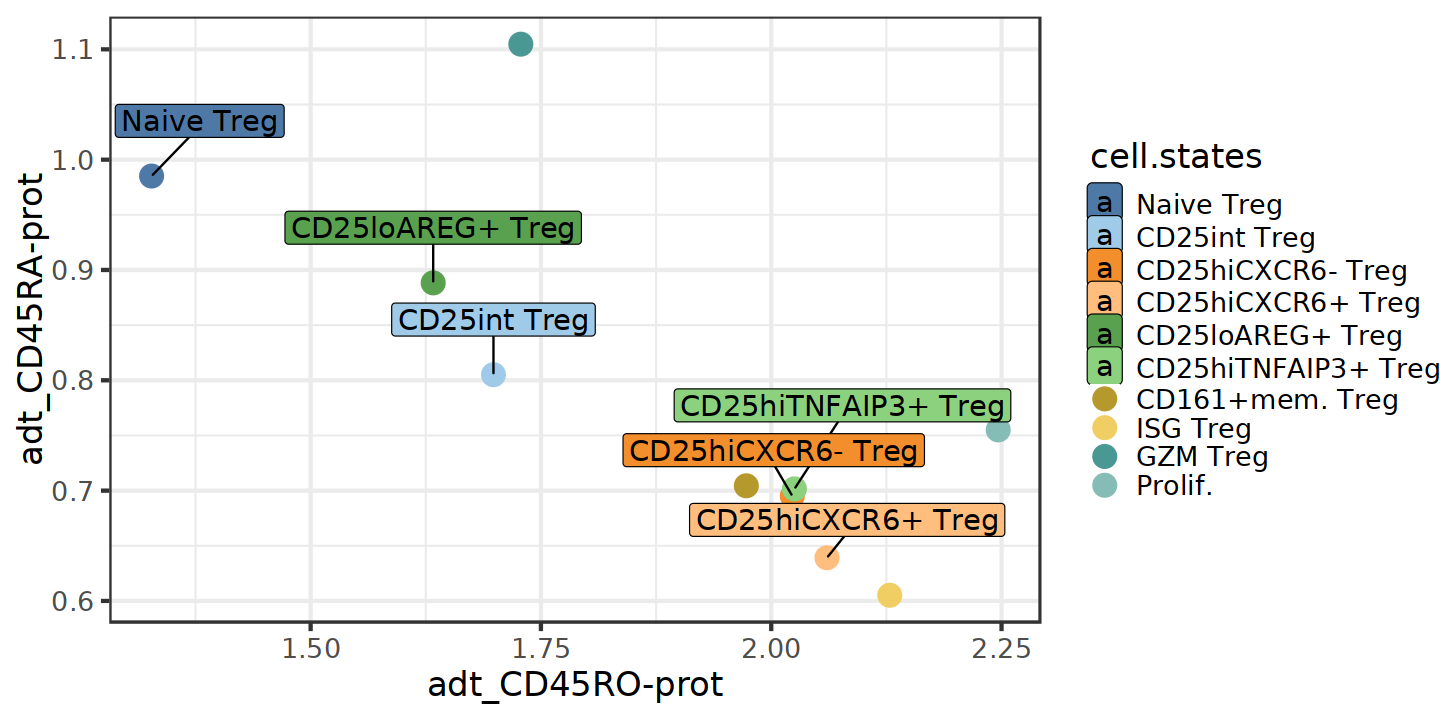

In [26]:
pdf(file = paste(saving.path, "Figures/Fig1J.CD45RA.RO.comparison.pdf", sep = ''),
    width = 12, 
    height = 6)

gp
dev.off()
gp



### Figure 1K

pdf 
  2

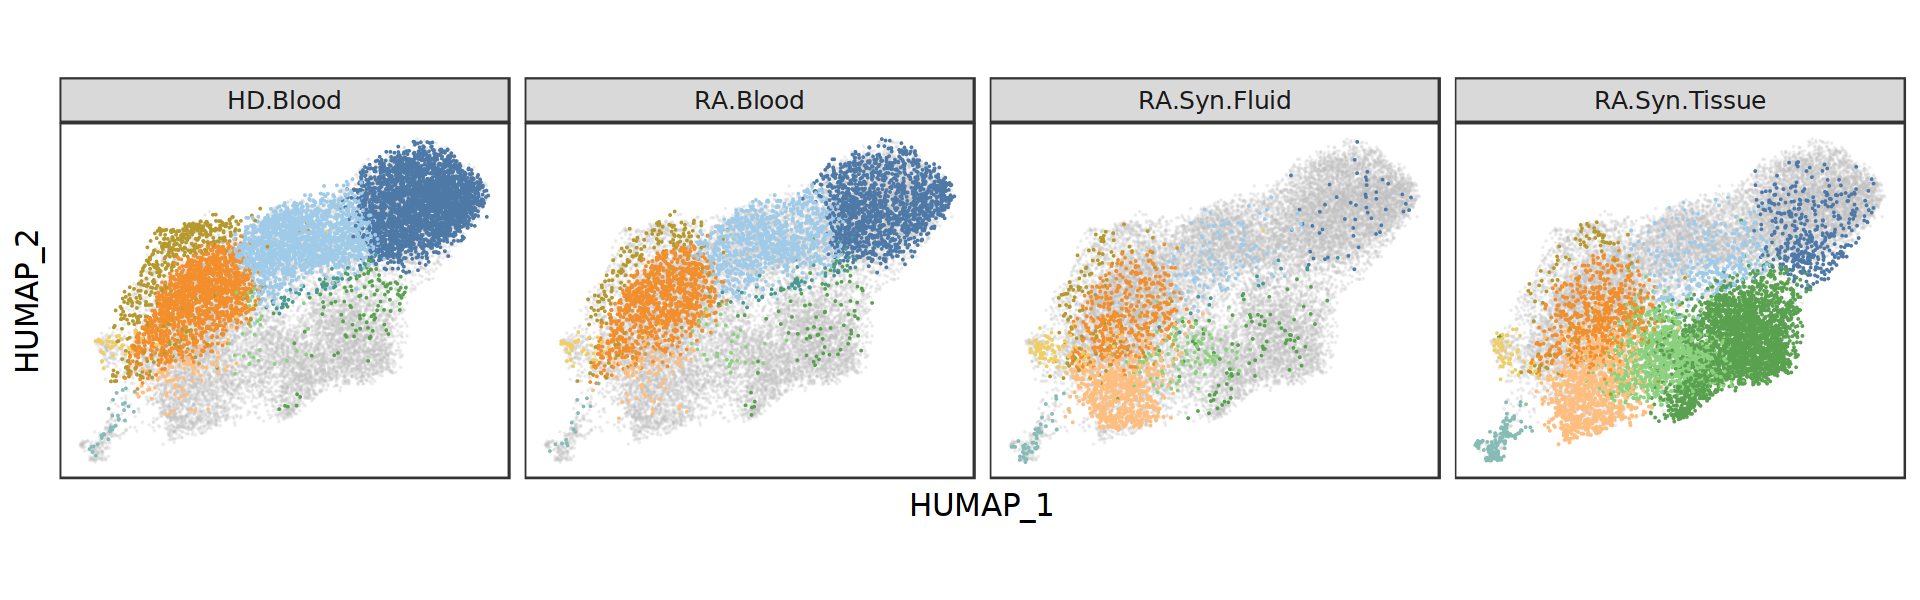

In [56]:
fig.size(5, 16)
umap.plot <- FetchData(merged, vars = c("HUMAP_1", "HUMAP_2", "cell.states", "tissue"))
umap.bg <- umap.plot %>% select(-tissue)

pdf(file = paste(saving.path, "Figures/Fig1K.ClustersUMAP.TissueSplit.pdf", sep = ''),
    width = 16, 
    height = 5)

f1k <- ggplot(umap.plot, aes(x = HUMAP_1, y = HUMAP_2)) + geom_point(data = umap.bg, color = "grey", alpha = 0.2, size = 0.01) + 
    geom_point(aes(color = cell.states), size = 0.02) + coord_fixed() + 
    facet_wrap(~tissue, nrow = 1) + 
    scale_color_manual(values = cell.state.colors$cell.states) + theme_bw(base_size = 18) + 
    theme(legend.position = "None", panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         axis.text.x=element_blank(), axis.ticks.x=element_blank(), axis.text.y=element_blank(), axis.ticks.y=element_blank())
f1k
dev.off()
f1k

pdf 
  2

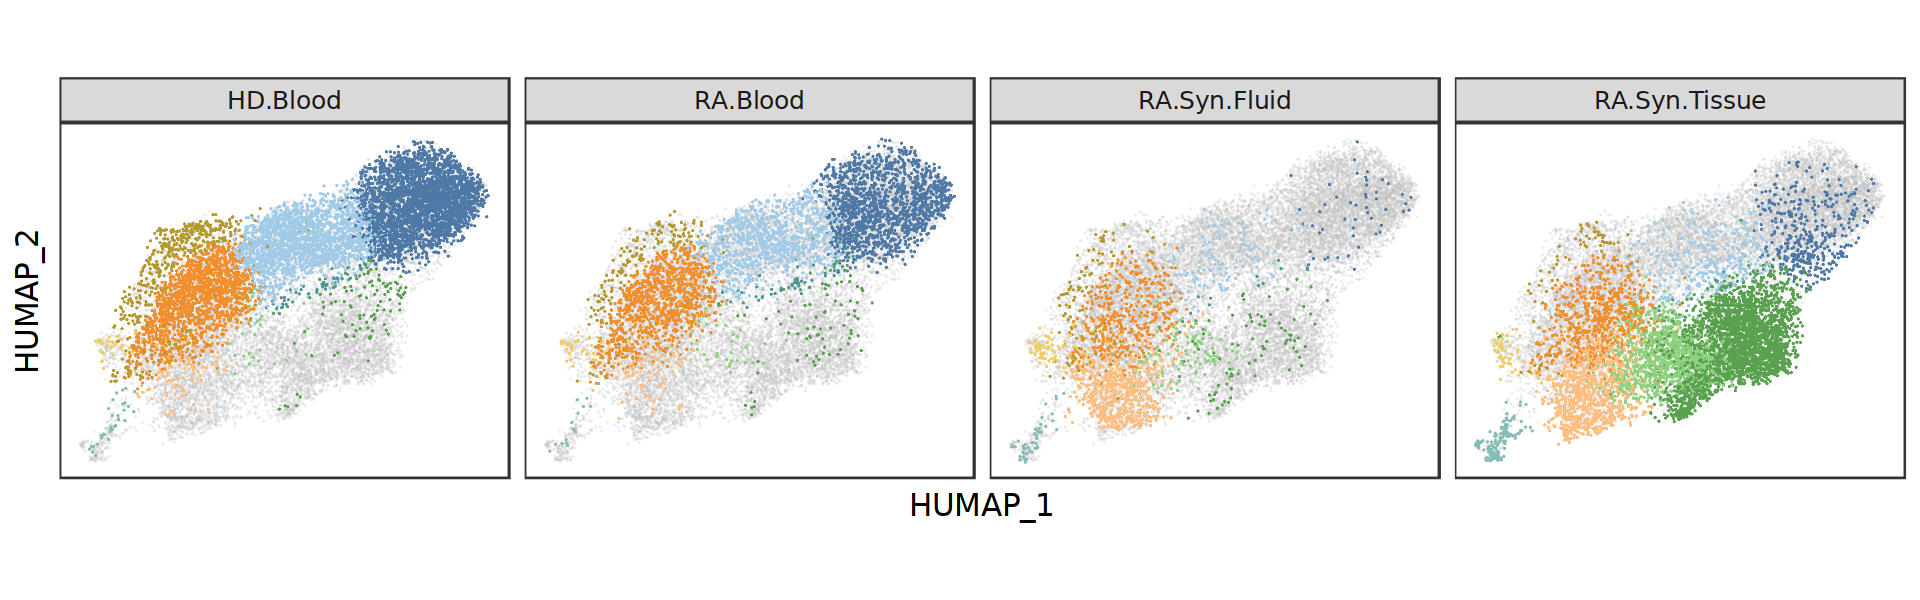

In [58]:
pdf(file = paste(saving.path, "Figures/Fig1K.ClustersUMAP.TissueSplit.rasterized.pdf", sep = ''),
    width = 16, 
    height = 5)

rasterize(f1k, dpi = 300)
dev.off()
rasterize(f1k, dpi = 300)


pdf 
  2

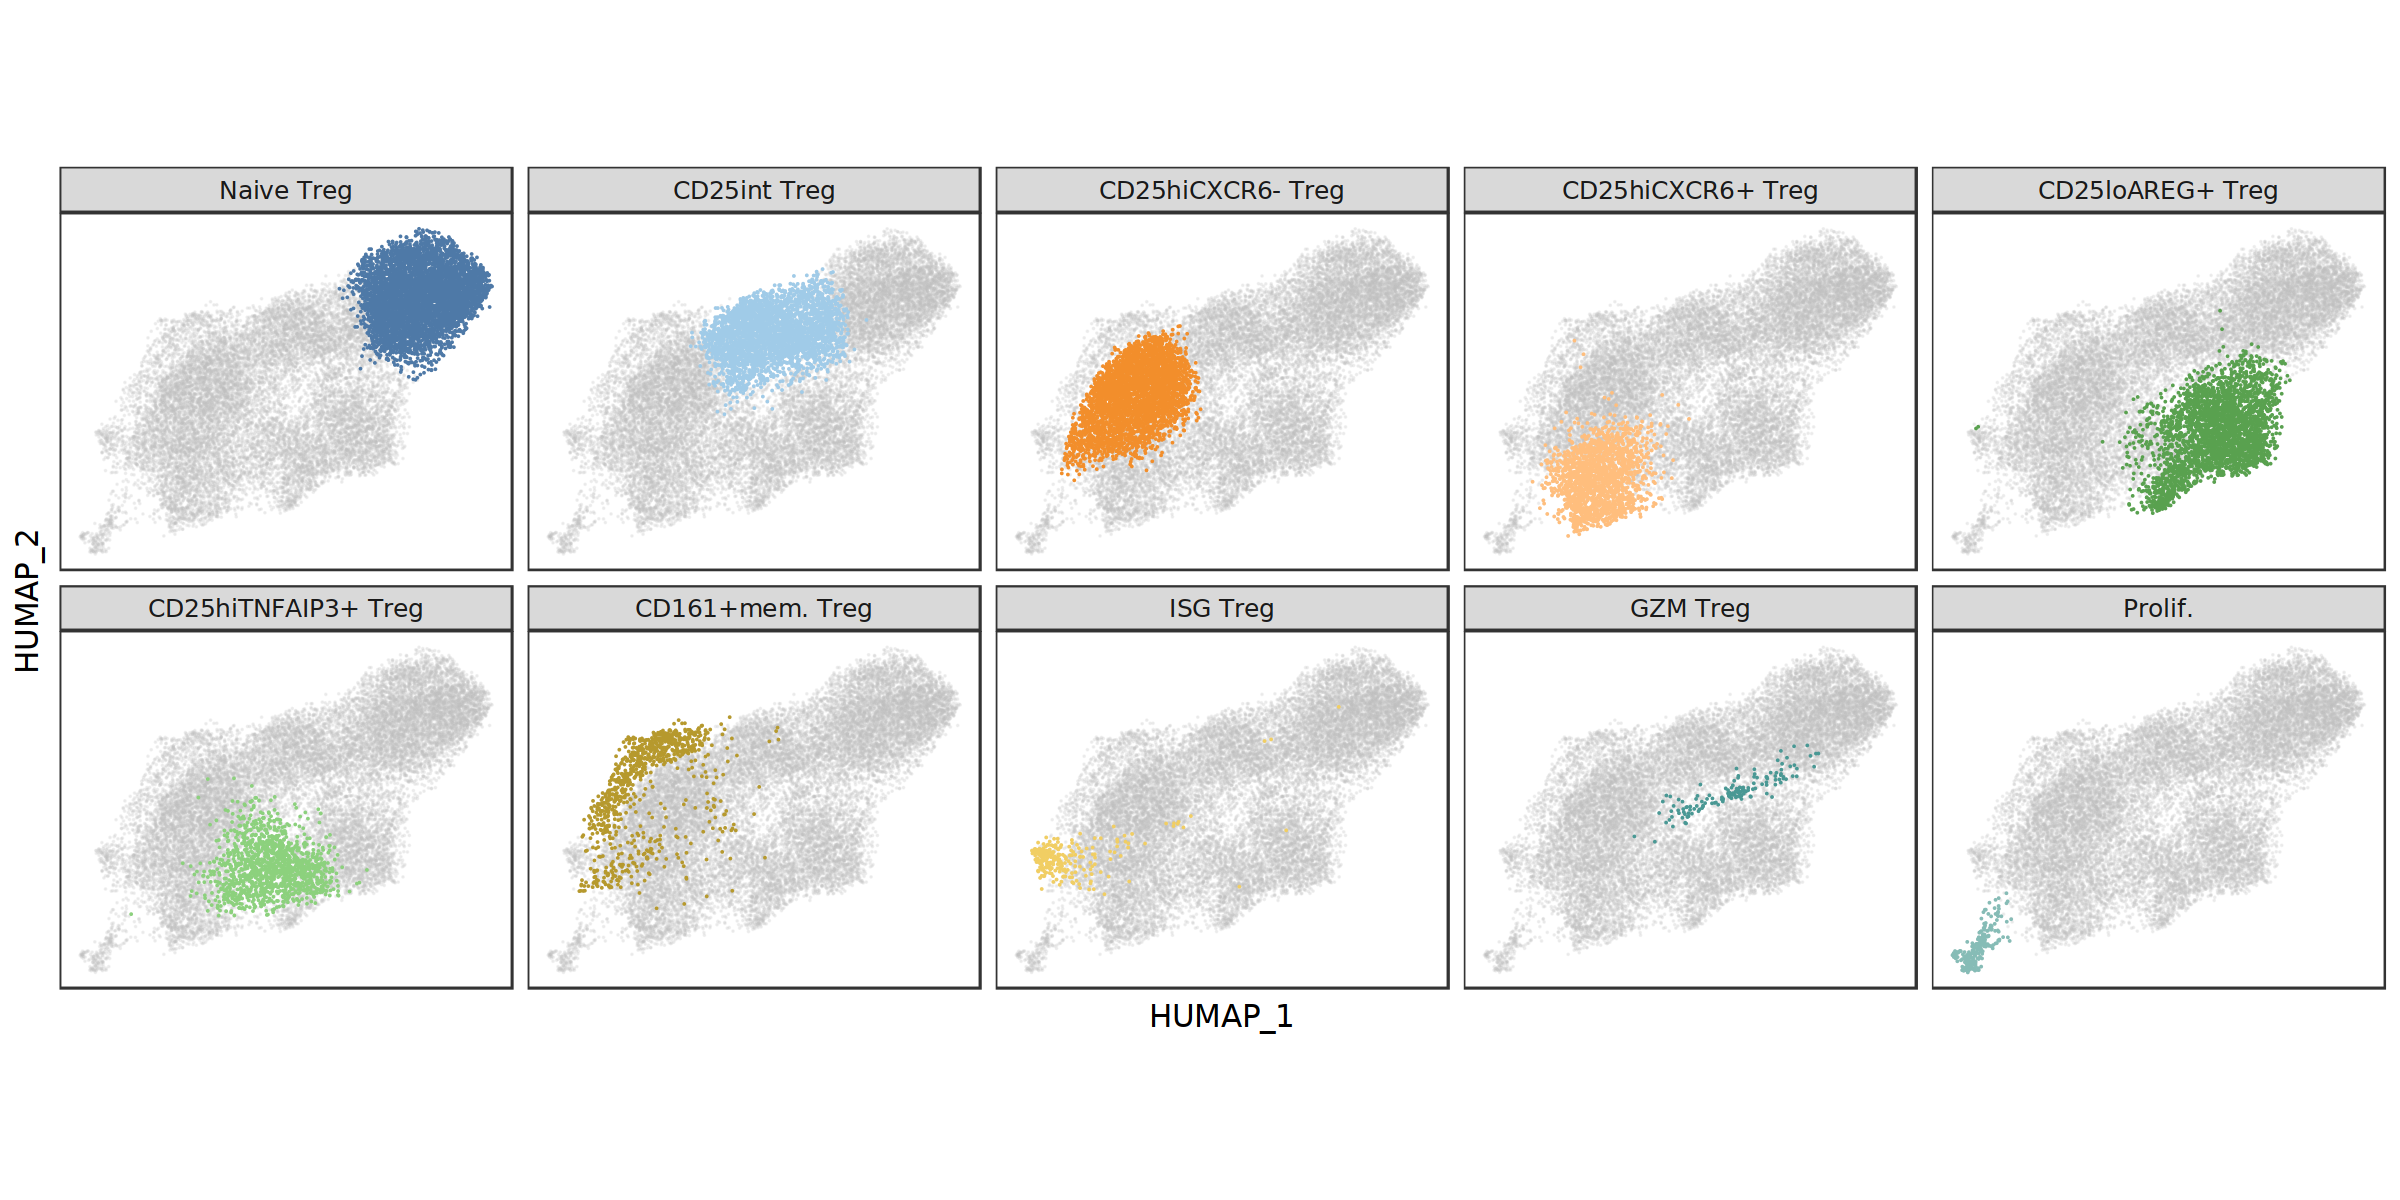

In [28]:
fig.size(10, 20)
umap.plot <- FetchData(merged, vars = c("HUMAP_1", "HUMAP_2", "cell.states"))
umap.bg <- umap.plot %>% select(-cell.states)



pdf(file = paste(saving.path, "Figures/ClustersHighlight.pdf", sep = ''),
    width = 20, 
    height = 10)

gp <- ggplot(umap.plot, aes(x = HUMAP_1, y = HUMAP_2)) + geom_point(data = umap.bg, color = "grey", alpha = 0.2, size = 0.01) + 
    geom_point(aes(color = cell.states), size = 0.01) +
    facet_wrap(~cell.states, nrow = 2) + 
    scale_color_tableau("Tableau 20") + theme_bw(base_size = 18) + 
    theme(legend.position = "None", panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         axis.text.x=element_blank(), axis.ticks.x=element_blank(), axis.text.y=element_blank(), axis.ticks.y=element_blank()) + coord_fixed()

gp
dev.off()
gp


### Figure 1L

In [ ]:
# fig.size(8,9)
# sum.clust <- merged@meta.data %>% tibble::rownames_to_column(var = "cell.ID") %>% 
#     dplyr::select(cell.ID, cell.states, tissue, orig.ident)
# pt <- table(sum.clust$cell.states, sum.clust$tissue)
# pt
# pt %>%  data.frame() %>% setNames(c("cluster", "tissue", "Freq")) %>% 
#     ggplot(aes(x = tissue, y = Freq, fill = cluster)) + scale_fill_manual(values = cell.state.colors$cell.states) + 
#         theme_bw(base_size = 20) + theme(axis.text.x = element_text(angle = 45, hjust = 1))-> pl
# pl + geom_col(position = "stack") + theme(plot.margin = margin(5,1,1,80))


# pdf(file = paste(saving.path, "Figures/Fig1K.BarPlot_tissue_cluster.pdf", sep = ''),
#     width = 9, 
#     height = 8)

# plot.save <- pl + geom_col(position = "fill") + theme(plot.margin = margin(5,1,1,80))

# plot.save
# dev.off()
# plot.save

`summarise()` has grouped output by 'cell.states'. You can override using the
`.groups` argument.


pdf 
  2

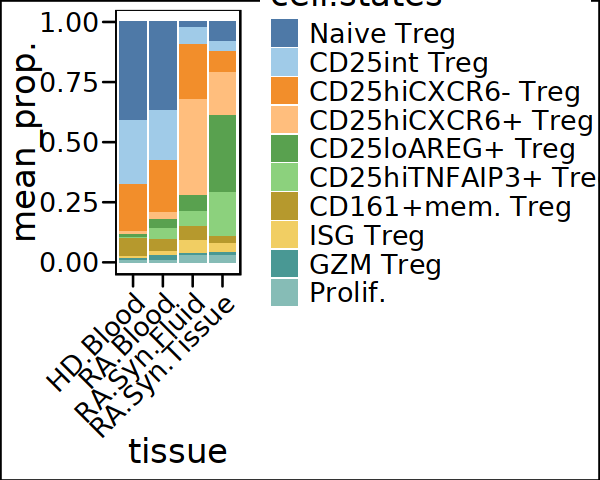

In [53]:
fig.size(4,5)

pdf(file = paste(saving.path, "Figures/Fig1L.BarPlot_tissue_cluster_perDonor.pdf", sep = ''),
    width = 5, 
    height = 4)

p <- cluster.condition.bar.plot(merged@meta.data, sym("cell.states"), sym("tissue"), sym("donorID")) + 
theme(text = element_text(size = 20))
p
dev.off()
p

                     
                      HD.Blood RA.Blood RA.Syn.Fluid RA.Syn.Tissue
  Naive Treg              2911     1464           50           404
  CD25int Treg            1746      903          118           307
  CD25hiCXCR6- Treg       1500      958          416           605
  CD25hiCXCR6+ Treg         93       82          615           955
  CD25loAREG+ Treg         109       83           84          2696
  CD25hiTNFAIP3+ Treg       37       36          117          1115
  CD161+mem. Treg          492      172          112           101
  ISG Treg                  49       41           90            67
  GZM Treg                  54       58           15            18
  Prolif.                   35       15           46           140

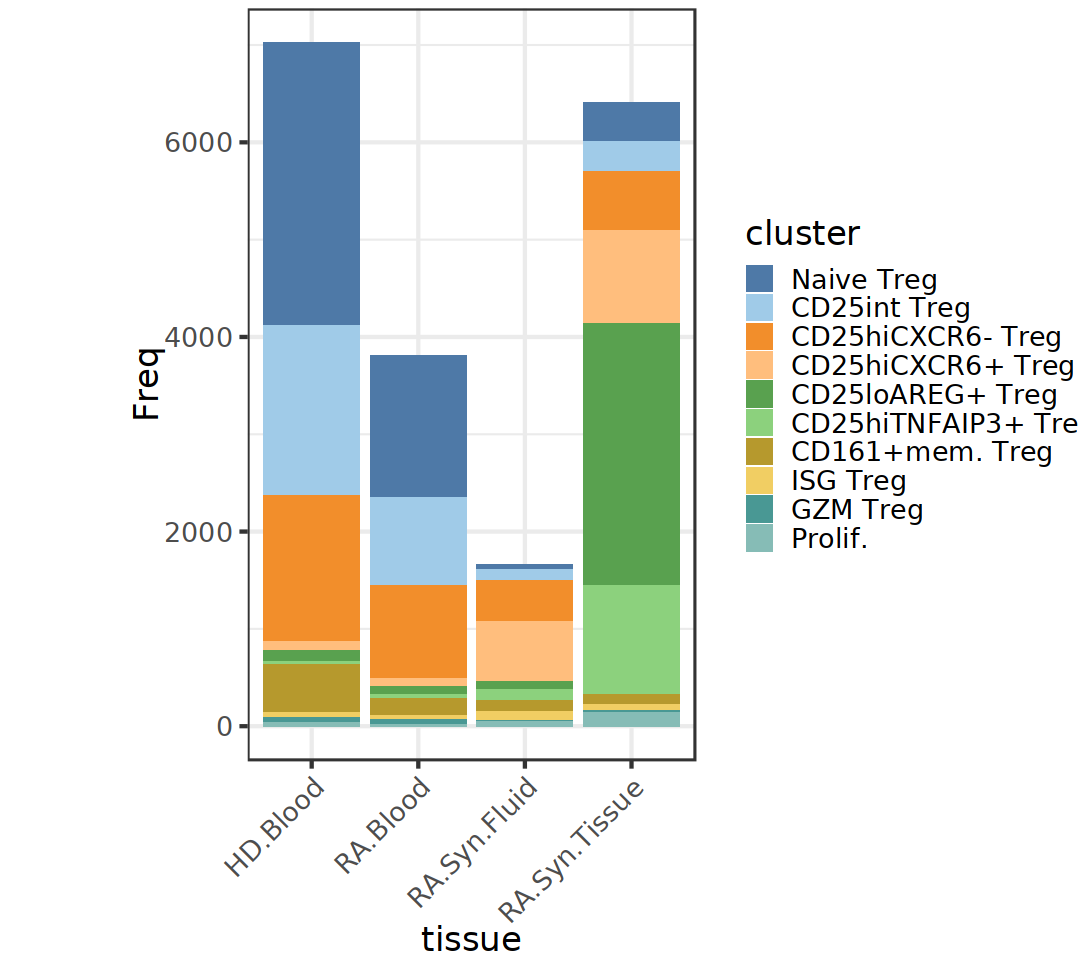

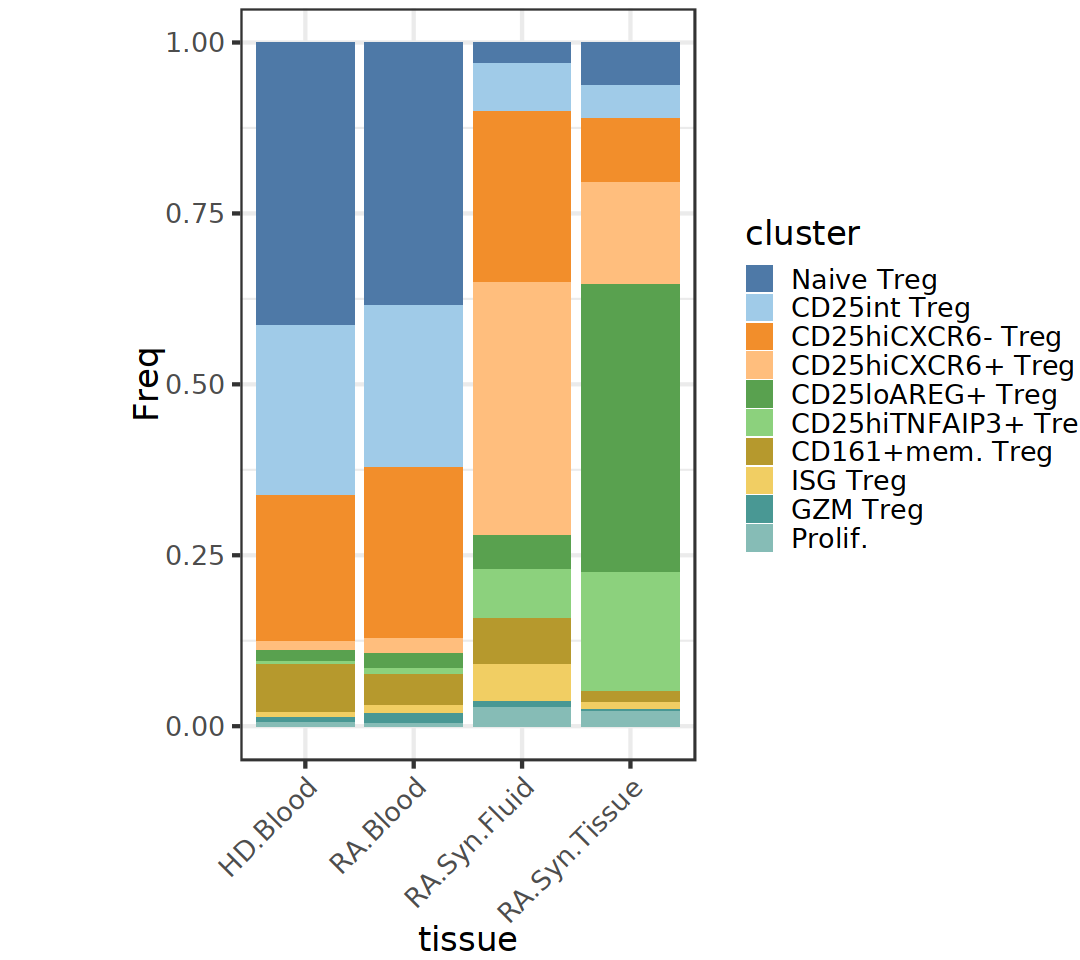

In [32]:
fig.size(8,9)
sum.clust <- merged@meta.data %>% tibble::rownames_to_column(var = "cell.ID") %>% 
    dplyr::select(cell.ID, cell.states, tissue, orig.ident, donorID)
pt <- table(sum.clust$cell.states, sum.clust$tissue)
pt
pt %>%  data.frame() %>% setNames(c("cluster", "tissue", "Freq")) %>% 
    ggplot(aes(x = tissue, y = Freq, fill = cluster)) + scale_fill_manual(values = cell.state.colors$cell.states) + 
        theme_bw(base_size = 20) + theme(axis.text.x = element_text(angle = 45, hjust = 1))-> pl
pl + geom_col(position = "stack") + theme(plot.margin = margin(5,1,1,80))


# pdf(file = paste(saving.path, "Figures/Fig1K.BarPlot_tissue_cluster.pdf", sep = ''),
#     width = 9, 
#     height = 8)

plot.save <- pl + geom_col(position = "fill") + theme(plot.margin = margin(5,1,1,80))

plot.save
# dev.off()
# plot.save

In [ ]:
# Byunghee's data  - validation (fig 1m)

In [27]:
bh.data <- read.csv(paste(saving.path,"/Figures/Fig1M_data_mod.csv", sep = "")) %>% 
tidyr::pivot_longer(cols = names(.)[3:10], names_to = "donorID")
head(bh.data)

cell.states         tissue   donorID value   
1 CD25hiCXCR6pos Treg HD.Blood donor1  16.89147
2 CD25hiCXCR6pos Treg HD.Blood donor2  34.71855
3 CD25hiCXCR6pos Treg HD.Blood donor3  13.48974
4 CD25hiCXCR6pos Treg HD.Blood donor4  19.14000
5 CD25hiCXCR6pos Treg HD.Blood donor5  36.08500
6 CD25hiCXCR6pos Treg HD.Blood donor6  17.98950

In [28]:
bh.data$cell.states

[1] "CD25hiCXCR6pos Treg" "CD25hiCXCR6pos Treg" "CD25hiCXCR6pos Treg"
  [4] "CD25hiCXCR6pos Treg" "CD25hiCXCR6pos Treg" "CD25hiCXCR6pos Treg"
  [7] "CD25hiCXCR6pos Treg" "CD25hiCXCR6pos Treg" "CD25hiCXCR6pos Treg"
 [10] "CD25hiCXCR6pos Treg" "CD25hiCXCR6pos Treg" "CD25hiCXCR6pos Treg"
 [13] "CD25hiCXCR6pos Treg" "CD25hiCXCR6pos Treg" "CD25hiCXCR6pos Treg"
 [16] "CD25hiCXCR6pos Treg" "CD25hiCXCR6pos Treg" "CD25hiCXCR6pos Treg"
 [19] "CD25hiCXCR6pos Treg" "CD25hiCXCR6pos Treg" "CD25hiCXCR6pos Treg"
 [22] "CD25hiCXCR6pos Treg" "CD25hiCXCR6pos Treg" "CD25hiCXCR6pos Treg"
 [25] "CD25hiCXCR6pos Treg" "CD25hiCXCR6pos Treg" "CD25hiCXCR6pos Treg"
 [28] "CD25hiCXCR6pos Treg" "CD25hiCXCR6pos Treg" "CD25hiCXCR6pos Treg"
 [31] "CD25hiCXCR6pos Treg" "CD25hiCXCR6pos Treg" "CD25hiCXCR6neg Treg"
 [34] "CD25hiCXCR6neg Treg" "CD25hiCXCR6neg Treg" "CD25hiCXCR6neg Treg"
 [37] "CD25hiCXCR6neg Treg" "CD25hiCXCR6neg Treg" "CD25hiCXCR6neg Treg"
 [40] "CD25hiCXCR6neg Treg" "CD25hiCXCR6neg Treg" "CD25hiCXCR6neg Treg"
 [43] "CD25hiCXCR6neg Treg" "CD25hiCXCR6neg Treg" "CD25hiCXCR6neg Treg"
 [46] "CD25hiCXCR6neg Treg" "CD25hiCXCR6neg Treg" "CD25hiCXCR6neg Treg"
 [49] "CD25hiCXCR6neg Treg" "CD25hiCXCR6neg Treg" "CD25hiCXCR6neg Treg"
 [52] "CD25hiCXCR6neg Treg" "CD25hiCXCR6neg Treg" "CD25hiCXCR6neg Treg"
 [55] "CD25hiCXCR6neg Treg" "CD25hiCXCR6neg Treg" "CD25hiCXCR6neg Treg"
 [58] "CD25hiCXCR6neg Treg" "CD25hiCXCR6neg Treg" "CD25hiCXCR6neg Treg"
 [61] "CD25hiCXCR6neg Treg" "CD25hiCXCR6neg Treg" "CD25hiCXCR6neg Treg"
 [64] "CD25hiCXCR6neg Treg" "CD25int"             "CD25int"            
 [67] "CD25int"             "CD25int"             "CD25int"            
 [70] "CD25int"             "CD25int"             "CD25int"            
 [73] "CD25int"             "CD25int"             "CD25int"            
 [76] "CD25int"             "CD25int"             "CD25int"            
 [79] "CD25int"             "CD25int"             "CD25int"            
 [82] "CD25int"             "CD25int"             "CD25int"            
 [85] "CD25int"             "CD25int"             "CD25int"            
 [88] "CD25int"             "CD25int"             "CD25int"            
 [91] "CD25int"             "CD25int"             "CD25int"            
 [94] "CD25int"             "CD25int"             "CD25int"            
 [97] "CD25loAREG+ Tregrs"  "CD25loAREG+ Tregrs"  "CD25loAREG+ Tregrs" 
[100] "CD25loAREG+ Tregrs"  "CD25loAREG+ Tregrs"  "CD25loAREG+ Tregrs" 
[103] "CD25loAREG+ Tregrs"  "CD25loAREG+ Tregrs"  "CD25loAREG+ Tregrs" 
[106] "CD25loAREG+ Tregrs"  "CD25loAREG+ Tregrs"  "CD25loAREG+ Tregrs" 
[109] "CD25loAREG+ Tregrs"  "CD25loAREG+ Tregrs"  "CD25loAREG+ Tregrs" 
[112] "CD25loAREG+ Tregrs"  "CD25loAREG+ Tregrs"  "CD25loAREG+ Tregrs" 
[115] "CD25loAREG+ Tregrs"  "CD25loAREG+ Tregrs"  "CD25loAREG+ Tregrs" 
[118] "CD25loAREG+ Tregrs"  "CD25loAREG+ Tregrs"  "CD25loAREG+ Tregrs" 
[121] "CD25loAREG+ Tregrs"  "CD25loAREG+ Tregrs"  "CD25loAREG+ Tregrs" 
[124] "CD25loAREG+ Tregrs"  "CD25loAREG+ Tregrs"  "CD25loAREG+ Tregrs" 
[127] "CD25loAREG+ Tregrs"  "CD25loAREG+ Tregrs"  "Na\xefve Treg"      
[130] "Na\xefve Treg"       "Na\xefve Treg"       "Na\xefve Treg"      
[133] "Na\xefve Treg"       "Na\xefve Treg"       "Na\xefve Treg"      
[136] "Na\xefve Treg"       "Na\xefve Treg"       "Na\xefve Treg"      
[139] "Na\xefve Treg"       "Na\xefve Treg"       "Na\xefve Treg"      
[142] "Na\xefve Treg"       "Na\xefve Treg"       "Na\xefve Treg"      
[145] "Na\xefve Treg"       "Na\xefve Treg"       "Na\xefve Treg"      
[148] "Na\xefve Treg"       "Na\xefve Treg"       "Na\xefve Treg"      
[151] "Na\xefve Treg"       "Na\xefve Treg"       "Na\xefve Treg"      
[154] "Na\xefve Treg"       "Na\xefve Treg"       "Na\xefve Treg"      
[157] "Na\xefve Treg"       "Na\xefve Treg"       "Na\xefve Treg"      
[160] "Na\xefve Treg"

In [29]:
bh.data <- bh.data %>% mutate(cell.states = gsub("CD25hiCXCR6pos Treg", "CD25hiCXCR6+ Treg", cell.states)) %>% 
                        mutate(cell.states = gsub("CD25hiCXCR6neg Treg", "CD25hiCXCR6- Treg", cell.states)) %>% 
                        mutate(cell.states = gsub("CD25int", "CD25int Treg", cell.states)) %>% 
                        mutate(cell.states = gsub("Tregrs", "Treg", cell.states)) %>% 
                        mutate(cell.states = gsub("Na\xefve Treg", "Naive Treg", cell.states))

In [30]:
bh.data$cell.states

[1] "CD25hiCXCR6+ Treg" "CD25hiCXCR6+ Treg" "CD25hiCXCR6+ Treg"
  [4] "CD25hiCXCR6+ Treg" "CD25hiCXCR6+ Treg" "CD25hiCXCR6+ Treg"
  [7] "CD25hiCXCR6+ Treg" "CD25hiCXCR6+ Treg" "CD25hiCXCR6+ Treg"
 [10] "CD25hiCXCR6+ Treg" "CD25hiCXCR6+ Treg" "CD25hiCXCR6+ Treg"
 [13] "CD25hiCXCR6+ Treg" "CD25hiCXCR6+ Treg" "CD25hiCXCR6+ Treg"
 [16] "CD25hiCXCR6+ Treg" "CD25hiCXCR6+ Treg" "CD25hiCXCR6+ Treg"
 [19] "CD25hiCXCR6+ Treg" "CD25hiCXCR6+ Treg" "CD25hiCXCR6+ Treg"
 [22] "CD25hiCXCR6+ Treg" "CD25hiCXCR6+ Treg" "CD25hiCXCR6+ Treg"
 [25] "CD25hiCXCR6+ Treg" "CD25hiCXCR6+ Treg" "CD25hiCXCR6+ Treg"
 [28] "CD25hiCXCR6+ Treg" "CD25hiCXCR6+ Treg" "CD25hiCXCR6+ Treg"
 [31] "CD25hiCXCR6+ Treg" "CD25hiCXCR6+ Treg" "CD25hiCXCR6- Treg"
 [34] "CD25hiCXCR6- Treg" "CD25hiCXCR6- Treg" "CD25hiCXCR6- Treg"
 [37] "CD25hiCXCR6- Treg" "CD25hiCXCR6- Treg" "CD25hiCXCR6- Treg"
 [40] "CD25hiCXCR6- Treg" "CD25hiCXCR6- Treg" "CD25hiCXCR6- Treg"
 [43] "CD25hiCXCR6- Treg" "CD25hiCXCR6- Treg" "CD25hiCXCR6- Treg"
 [46] "CD25hiCXCR6- Treg" "CD25hiCXCR6- Treg" "CD25hiCXCR6- Treg"
 [49] "CD25hiCXCR6- Treg" "CD25hiCXCR6- Treg" "CD25hiCXCR6- Treg"
 [52] "CD25hiCXCR6- Treg" "CD25hiCXCR6- Treg" "CD25hiCXCR6- Treg"
 [55] "CD25hiCXCR6- Treg" "CD25hiCXCR6- Treg" "CD25hiCXCR6- Treg"
 [58] "CD25hiCXCR6- Treg" "CD25hiCXCR6- Treg" "CD25hiCXCR6- Treg"
 [61] "CD25hiCXCR6- Treg" "CD25hiCXCR6- Treg" "CD25hiCXCR6- Treg"
 [64] "CD25hiCXCR6- Treg" "CD25int Treg"      "CD25int Treg"     
 [67] "CD25int Treg"      "CD25int Treg"      "CD25int Treg"     
 [70] "CD25int Treg"      "CD25int Treg"      "CD25int Treg"     
 [73] "CD25int Treg"      "CD25int Treg"      "CD25int Treg"     
 [76] "CD25int Treg"      "CD25int Treg"      "CD25int Treg"     
 [79] "CD25int Treg"      "CD25int Treg"      "CD25int Treg"     
 [82] "CD25int Treg"      "CD25int Treg"      "CD25int Treg"     
 [85] "CD25int Treg"      "CD25int Treg"      "CD25int Treg"     
 [88] "CD25int Treg"      "CD25int Treg"      "CD25int Treg"     
 [91] "CD25int Treg"      "CD25int Treg"      "CD25int Treg"     
 [94] "CD25int Treg"      "CD25int Treg"      "CD25int Treg"     
 [97] "CD25loAREG+ Treg"  "CD25loAREG+ Treg"  "CD25loAREG+ Treg" 
[100] "CD25loAREG+ Treg"  "CD25loAREG+ Treg"  "CD25loAREG+ Treg" 
[103] "CD25loAREG+ Treg"  "CD25loAREG+ Treg"  "CD25loAREG+ Treg" 
[106] "CD25loAREG+ Treg"  "CD25loAREG+ Treg"  "CD25loAREG+ Treg" 
[109] "CD25loAREG+ Treg"  "CD25loAREG+ Treg"  "CD25loAREG+ Treg" 
[112] "CD25loAREG+ Treg"  "CD25loAREG+ Treg"  "CD25loAREG+ Treg" 
[115] "CD25loAREG+ Treg"  "CD25loAREG+ Treg"  "CD25loAREG+ Treg" 
[118] "CD25loAREG+ Treg"  "CD25loAREG+ Treg"  "CD25loAREG+ Treg" 
[121] "CD25loAREG+ Treg"  "CD25loAREG+ Treg"  "CD25loAREG+ Treg" 
[124] "CD25loAREG+ Treg"  "CD25loAREG+ Treg"  "CD25loAREG+ Treg" 
[127] "CD25loAREG+ Treg"  "CD25loAREG+ Treg"  "Naive Treg"       
[130] "Naive Treg"        "Naive Treg"        "Naive Treg"       
[133] "Naive Treg"        "Naive Treg"        "Naive Treg"       
[136] "Naive Treg"        "Naive Treg"        "Naive Treg"       
[139] "Naive Treg"        "Naive Treg"        "Naive Treg"       
[142] "Naive Treg"        "Naive Treg"        "Naive Treg"       
[145] "Naive Treg"        "Naive Treg"        "Naive Treg"       
[148] "Naive Treg"        "Naive Treg"        "Naive Treg"       
[151] "Naive Treg"        "Naive Treg"        "Naive Treg"       
[154] "Naive Treg"        "Naive Treg"        "Naive Treg"       
[157] "Naive Treg"        "Naive Treg"        "Naive Treg"       
[160] "Naive Treg"

`summarise()` has grouped output by 'cell.states'. You can override using the
`.groups` argument.


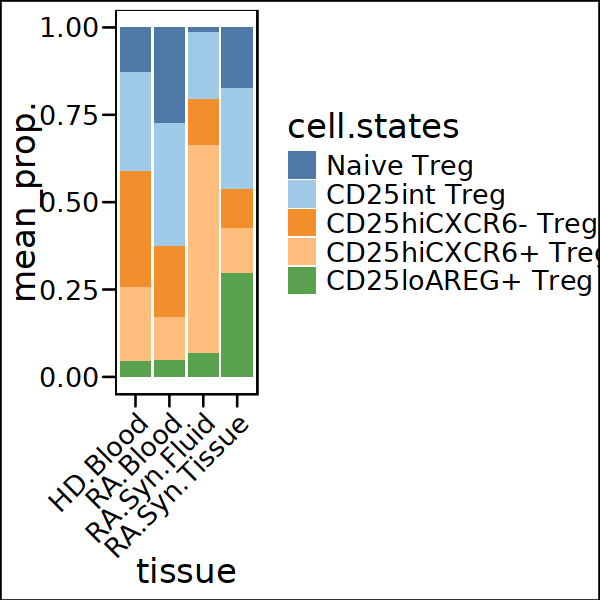

In [43]:
count.groups <- bh.data %>% 
    group_by(cell.states, tissue) %>% summarize(mean_prop. = mean(value, na.rm = T))

count.groups$cell.states <- factor(count.groups$cell.states, levels = c("Naive Treg", 
                                                                        "CD25int Treg", 
                                                                        "CD25hiCXCR6- Treg",
                                                                        "CD25hiCXCR6+ Treg",
                                                                        'CD25loAREG+ Treg'))
    
    f1m <- ggplot(count.groups, aes(x = tissue, y = mean_prop., fill = cell.states)) +
       geom_col(position = "fill") + scale_fill_manual(values = cell.state.colors$cell.states) + 
        theme_base(base_size = 20) + theme(axis.text.x = element_text(angle = 45, hjust = 1))
f1m

pdf 
  2

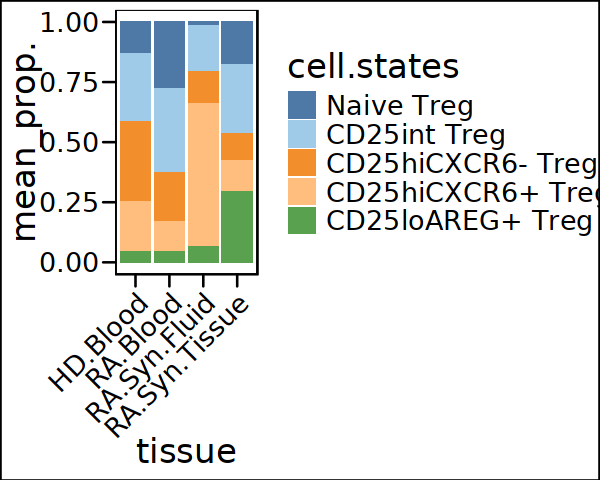

In [48]:
fig.size(4,5)

pdf(file = paste(saving.path, "Figures/Fig1M.BarPlot_expVlidation.pdf", sep = ''),
    width = 5, 
    height = 4)

f1m
dev.off()
f1m

## Figure 3

### Figure 3A

### Figure 3B

In [5]:
mergedWmetabolic <- readRDS("/data/brennerlab/Shani/projects/Treg/analysis/integrated/integrated.Tregs.WmetabolicScores.rds")

In [16]:
cell.states <- merged$cell.states
mergedWmetabolic <- AddMetaData(mergedWmetabolic
cell.states %>% head

BRI-401_AAACGCTCAATACCCA BRI-401_AAAGGATCACACACGC BRI-401_AACCAACCAGCTCTGG 
     CD25hiTNFAIP3+ Treg        CD25hiCXCR6- Treg                 ISG Treg 
BRI-401_ACCGTTCTCTCTGCCA BRI-401_AGGATCTCACCCTAGG BRI-401_AGGTAGGGTCGTACTA 
        CD25loAREG+ Treg      CD25hiTNFAIP3+ Treg               Naive Treg 
10 Levels: Naive Treg CD25int Treg CD25hiCXCR6- Treg ... Prolif.

BRI-401_AAACGCTCAATACCCA BRI-401_AAAGGATCACACACGC BRI-401_AACCAACCAGCTCTGG 
   CD25hiTNFAIP3pos Treg      CD25hiCXCR6neg Treg                 ISG Treg 
BRI-401_ACCGTTCTCTCTGCCA BRI-401_AGGATCTCACCCTAGG BRI-401_AGGTAGGGTCGTACTA 
      CD25loAREGpos Treg    CD25hiTNFAIP3pos Treg               Naive Treg 
10 Levels: Naive Treg CD25int Treg CD25hiCXCR6neg Treg ... Prolif.

In [209]:
ord.states <- mergedWmetabolic@meta.data %>% select(cell.states, glycolysis1) %>% group_by(cell.states) %>% 
summarise(med = median(glycolysis1)) %>% arrange(med)
# ord.states$cell.states <- factor(ord.states$cell.states)
ord.states

cell.states         med        
1  Naive Treg          0.005421899
2  GZM Treg            0.014861152
3  CD25loAREG+ Treg    0.021824270
4  CD25int Treg        0.031140997
5  CD161+mem. Treg     0.044132559
6  CD25hiTNFAIP3+ Treg 0.049487513
7  ISG Treg            0.053223433
8  CD25hiCXCR6- Treg   0.053812291
9  CD25hiCXCR6+ Treg   0.096975752
10 Prolif.             0.175221880

In [200]:
c <- combn(as.character(mergedWmetabolic$cell.states) %>% unique, m=2)
c<- data.frame(t(c)) %>% filter(X1 == "CD25hiCXCR6+ Treg" | X2 == "CD25hiCXCR6+ Treg") %>% t() %>% data.frame ()
c

X1                  X2                X3                X4               
X1 CD25hiTNFAIP3+ Treg CD25hiCXCR6- Treg ISG Treg          CD25loAREG+ Treg 
X2 CD25hiCXCR6+ Treg   CD25hiCXCR6+ Treg CD25hiCXCR6+ Treg CD25hiCXCR6+ Treg
   X5                X6                X7                X8               
X1 Naive Treg        CD161+mem. Treg   CD25hiCXCR6+ Treg CD25hiCXCR6+ Treg
X2 CD25hiCXCR6+ Treg CD25hiCXCR6+ Treg CD25int Treg      Prolif.          
   X9               
X1 CD25hiCXCR6+ Treg
X2 GZM Treg

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“Removed 5922 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 5922 rows containing non-finite outside the scale range
(`stat_signif()`).”


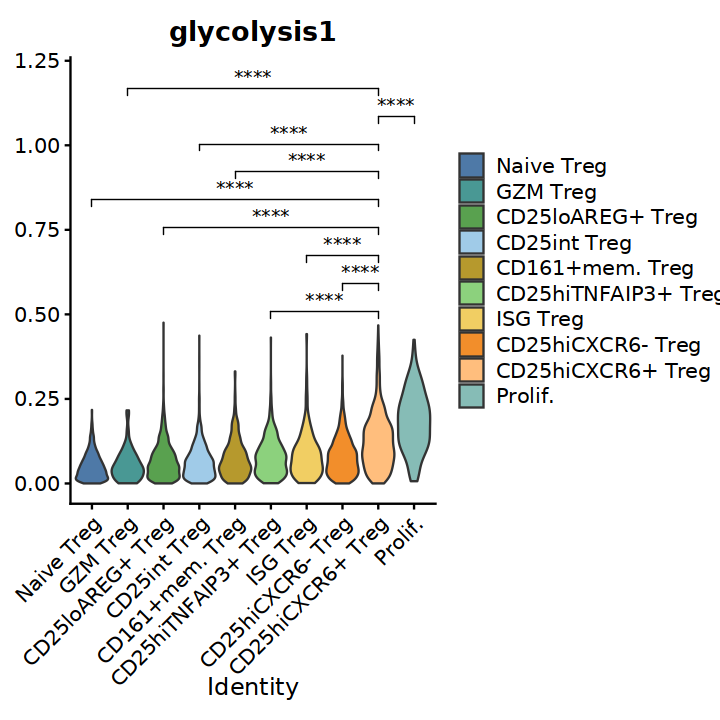

In [306]:
fig.size(6,6)
mergedWmetabolic$cell.states <- factor(mergedWmetabolic$cell.states, levels = ord.states$cell.states)
Idents(mergedWmetabolic) <- "cell.states"
VlnPlot(mergedWmetabolic, "glycolysis1", pt.size = 0) + scale_fill_manual(values = cell.state.colors$cell.states) +
stat_compare_means(comparisons = c, method = "wilcox.test", label = "p.signif", hide.ns = F) + ylim(0,1.2)

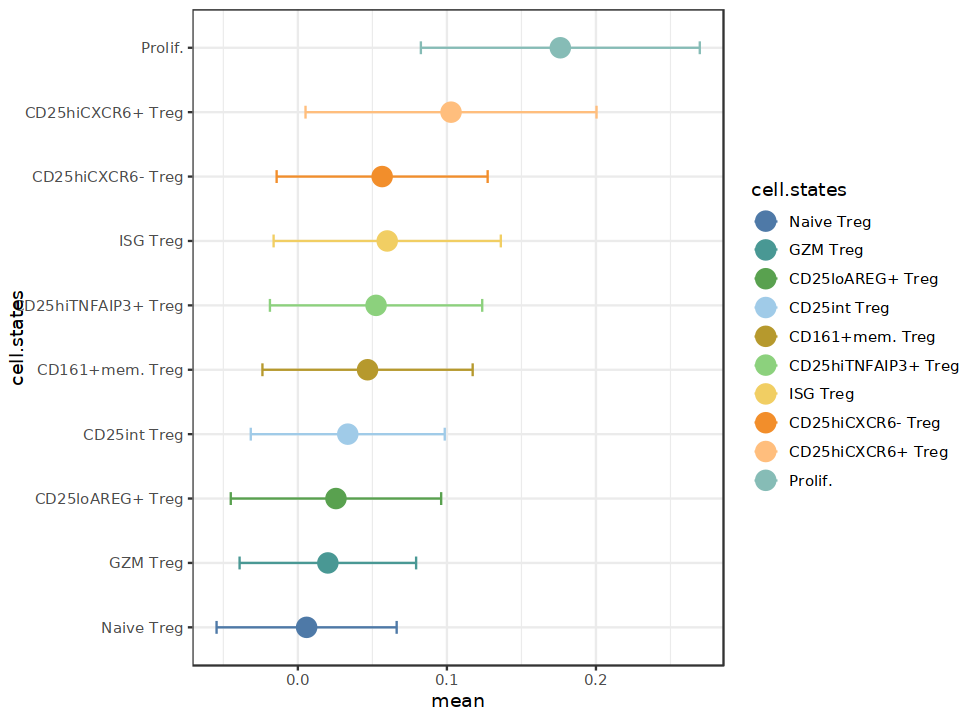

In [291]:
fig.size(6,8)
gly <- mergedWmetabolic@meta.data %>% select(cell.states, glycolysis1) %>% group_by(cell.states) %>% mutate(mean = mean(glycolysis1)) %>% 
        mutate(SD = sd(glycolysis1))%>%  select(cell.states, mean, SD) %>% distinct()
ggplot(gly, aes(x=mean, y = cell.states,color = cell.states)) + 
  geom_errorbar(aes(xmin=mean-SD, xmax=mean+SD), width=.2) + geom_point(aes(x=mean, y = cell.states), size = 5)+ 
    scale_color_manual(values = cell.state.colors$cell.states) +theme_bw()

Warning message:
“Removed 5919 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 5919 rows containing non-finite outside the scale range
(`stat_ydensity()`).”


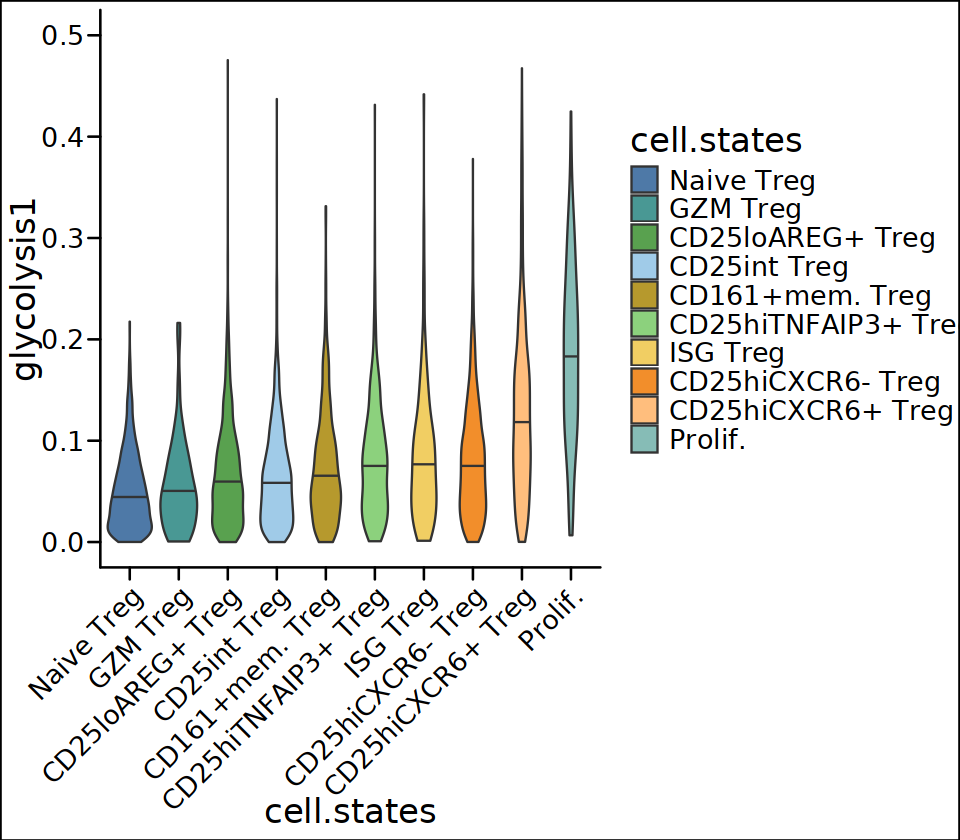

In [342]:
fig.size(7,8)
gly <- mergedWmetabolic@meta.data %>% select(cell.states, glycolysis1) 
ggplot(gly, aes(x = cell.states, y  = glycolysis1, fill = cell.states)) + 
geom_violin(draw_quantiles = c(0.5)) + scale_fill_manual(values = cell.state.colors$cell.states) +theme_bw() +
theme_base(base_size = 20) + 
theme(axis.text.x = element_text(angle = 45, hjust = 1),
      panel.border = element_blank(), panel.background = element_blank(), 
      axis.line.x.bottom = element_line(color = 'black'),
      axis.line.y.left   = element_line(color = 'black')) + ylim(0,0.5) 

ggsave(paste(saving.path, "Figures/Fig3B.Glycolysis.RA.pdf", sep = ''), width = 8, height = 7)

# stat_compare_means(method = "anova", label.y = 0.8)+ # Add global p-value
# stat_compare_means(#aes(label = after_stat(p.signif)),
#                   method = "wilcox.test", ref.group = "CD25hiCXCR6+ Treg", label = "p.signif", hide.ns = F)
# stat_compare_means(comparisons = c, method = "wilcox.test", label = "p.signif", hide.ns = F)

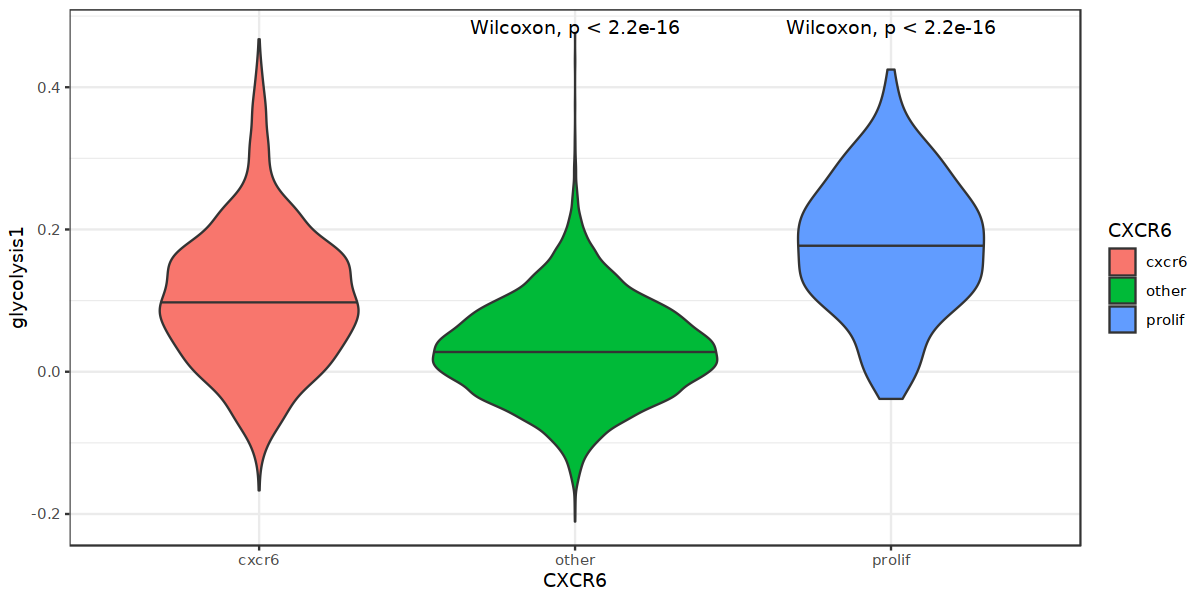

In [329]:
fig.size(5,10)
gly <- mergedWmetabolic@meta.data %>% select(cell.states, glycolysis1) %>% mutate(CXCR6 = ifelse(cell.states == "CD25hiCXCR6+ Treg", "cxcr6",                                                                                      ifelse(cell.states == "Prolif.", "prolif",
                                                                                                        "other")))
ggplot(gly, aes(x = CXCR6, y  =glycolysis1, fill = CXCR6)) + 
geom_violin(draw_quantiles = c(0.5)) +theme_bw() +#+ scale_fill_manual(values = cell.state.colors$cell.states) +theme_bw() +
# stat_compare_means(method = "anova", label.y = 0.8)+ # Add global p-value
stat_compare_means(#aes(label = after_stat(p.signif)),
                  method = "wilcox.test", ref.group = "cxcr6", hide.ns = F) 
# stat_compare_means(comparisons = c, method = "wilcox.test", label = "p.signif", hide.ns = F)

In [321]:
wilcox.test(gly$glycolysis1[gly$CXCR6 == "cxcr6"], gly$glycolysis1[gly$CXCR6 == "other"])

wilcox.test(gly$glycolysis1[gly$CXCR6 == "cxcr6"], gly$glycolysis1[gly$CXCR6 == "prolif"])


	Wilcoxon rank sum test with continuity correction

data:  gly$glycolysis1[gly$CXCR6 == "cxcr6"] and gly$glycolysis1[gly$CXCR6 == "other"]
W = 21353021, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  gly$glycolysis1[gly$CXCR6 == "cxcr6"] and gly$glycolysis1[gly$CXCR6 == "prolif"]
W = 118112, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


Warning message:
“Removed 1099 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 1099 rows containing non-finite outside the scale range
(`stat_ydensity()`).”


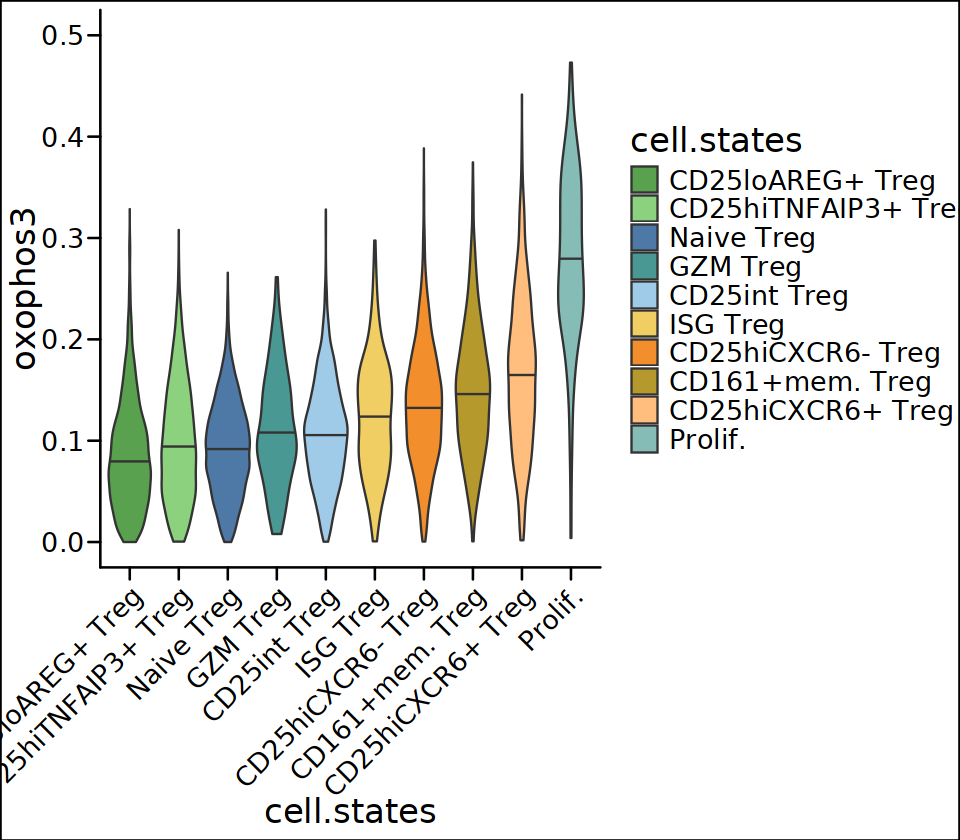

In [22]:
fig.size(7,8)
ord.states <- mergedWmetabolic@meta.data %>% select(cell.states, oxophos3) %>% group_by(cell.states) %>% 
summarise(med = median(oxophos3)) %>% arrange(med)
mergedWmetabolic$cell.states <- factor(mergedWmetabolic$cell.states, levels = ord.states$cell.states)


gly <- mergedWmetabolic@meta.data %>% select(cell.states, oxophos3) 
ggplot(gly, aes(x = cell.states, y = oxophos3, fill = cell.states)) + 
geom_violin(draw_quantiles = c(0.5)) + scale_fill_manual(values = cell.state.colors$cell.states) +theme_bw() +
theme_base(base_size = 20) + 
theme(axis.text.x = element_text(angle = 45, hjust = 1),
      panel.border = element_blank(), panel.background = element_blank(), 
      axis.line.x.bottom = element_line(color = 'black'),
      axis.line.y.left   = element_line(color = 'black')) + ylim(0,0.5) 

ggsave(paste(saving.path, "Figures/SupFig3C.Oxphos.RA.pdf", sep = ''), width = 8, height = 7)


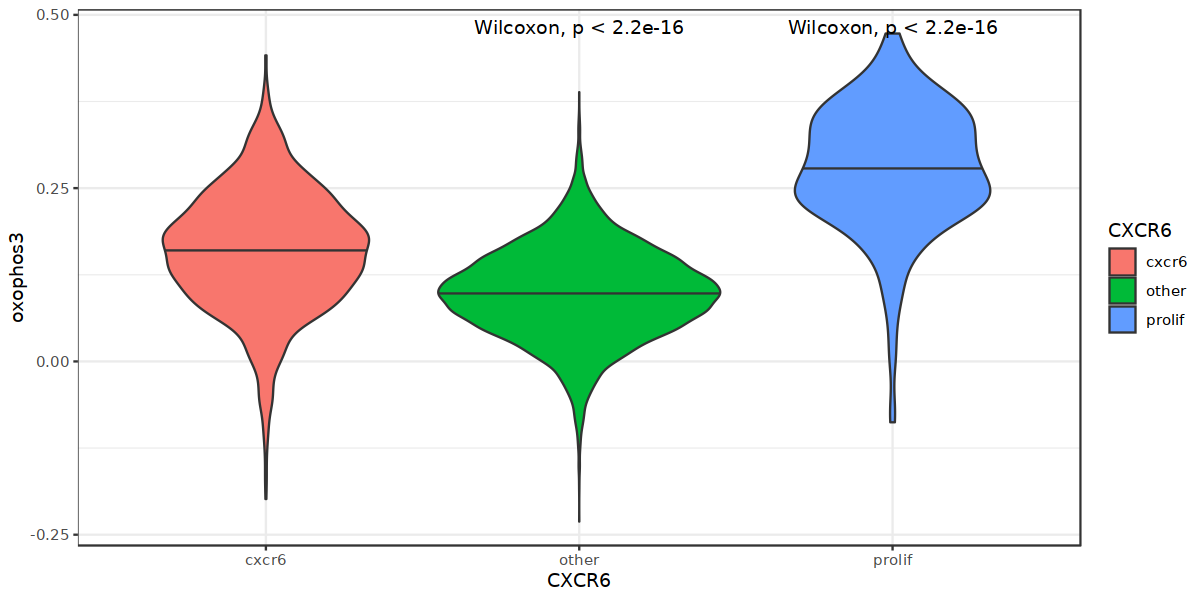

In [21]:
fig.size(5,10)
gly <- mergedWmetabolic@meta.data %>% select(cell.states, oxophos3) %>% 
mutate(CXCR6 = ifelse(cell.states == "CD25hiCXCR6+ Treg", "cxcr6",                                                                                      ifelse(cell.states == "Prolif.", "prolif",
                                                                                                        "other")))
ggplot(gly, aes(x = CXCR6, y  =oxophos3, fill = CXCR6)) + 
geom_violin(draw_quantiles = c(0.5)) +theme_bw() +#+ scale_fill_manual(values = cell.state.colors$cell.states) +theme_bw() +
# stat_compare_means(method = "anova", label.y = 0.8)+ # Add global p-value
stat_compare_means(#aes(label = after_stat(p.signif)),
                  method = "wilcox.test", ref.group = "cxcr6", hide.ns = F) 
# stat_compare_means(comparisons = c, method = "wilcox.test", label = "p.signif", hide.ns = F)

## Figure 4

### Figure 4B

pdf 
  2

pdf 
  2

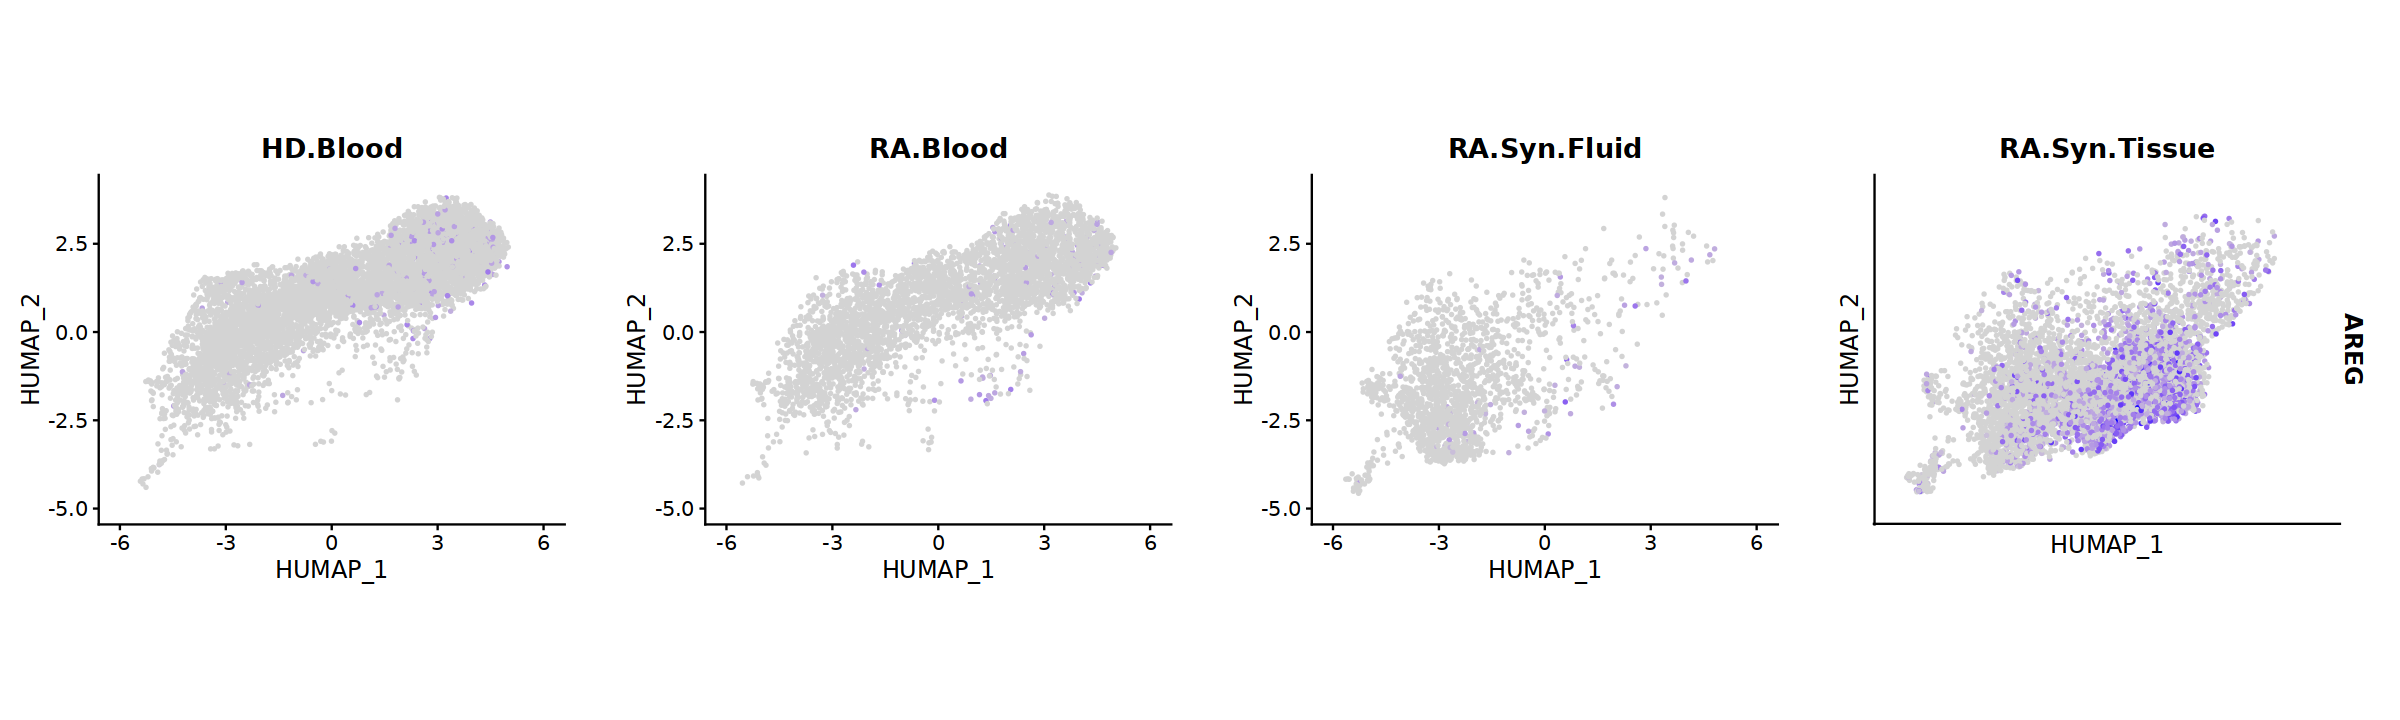

In [14]:
#Figure 4B
pdf(file = paste(saving.path, "Figures/SupFig4a.UMAP.AREG.TissueSplit.pdf", sep = ''),
    width = 20, 
    height = 6)

dp <- FeaturePlot(merged, features = "AREG", split.by = "tissue", pt.size = 0.5)  + 
        theme(legend.position = "None", panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         axis.text.x=element_blank(), axis.ticks.x=element_blank(), axis.text.y=element_blank(), axis.ticks.y=element_blank()) + 
        coord_fixed() 

dp
dev.off()

png(file = paste(saving.path, "Figures/SupFig4a.UMAP.AREG.TissueSplit.png", sep = ''), 
    units = "mm", res = 300,
    width = 150, height = 60)
dp
dev.off()
fig.size(6,20)
dp

### Figure 4C

In [ ]:
#Figure 4C
fig.size(5, 5)

gene.list.to.save <- c("AREG", "NR3C1" ,"FKBP5", "CD69", "CXCR4")

for (g in gene.list.to.save) {
pdf(file = paste(saving.path, "Figures/Fig4C.UMAP.", g, ".syn.pdf", sep = ''),
    width = 5, 
    height = 5)

dp <- FeaturePlot(merged, g, cells = rownames(merged@meta.data)[merged$tissue == "RA.Syn.Tissue"]) + coord_fixed()
print(dp)
dev.off()
print(dp)
} 


### Figure 4D

In [86]:
exp <- FetchData(merged, vars = c("NR3C1","AREG", "FKBP5","CCR7", "IKZF2","TIGIT", "FOXP3","IL2RA"), layer = "data")
cor.plot <- cor(exp)

In [87]:
# mat<- pbmc_metacell@assays$RNA@data[genes, cells] %>% 
#   as.matrix() %>%
#   t()

# Hmisc package gives the pair-wise correlation coefficient and p-value
cor_res<- Hmisc::rcorr(as.matrix(exp))
cor_mat<- cor_res$r
cor_mat

# sometimes, you may have NA in the matrix, and clustering does not play well with it
# a simple hack is to turn the NA to 0
# cor_mat[is.na(cor_mat)] <- 0


cor_p<- cor_res$P
cor_p

NR3C1       AREG        FKBP5        CCR7        IKZF2       TIGIT       
NR3C1  1.00000000  0.12163486  0.102958113 -0.02600105 -0.03803475  0.099735281
AREG   0.12163486  1.00000000  0.067244498  0.09097158 -0.06640585  0.062428476
FKBP5  0.10295811  0.06724450  1.000000000  0.02037558 -0.02823297  0.002125254
CCR7  -0.02600105  0.09097158  0.020375576  1.00000000 -0.08208967 -0.137099160
IKZF2 -0.03803475 -0.06640585 -0.028232970 -0.08208967  1.00000000  0.121312859
TIGIT  0.09973528  0.06242848  0.002125254 -0.13709916  0.12131286  1.000000000
FOXP3 -0.01225999 -0.09738691 -0.076230447 -0.10912690  0.08091831  0.172063157
IL2RA -0.05693947 -0.10124230 -0.084652887 -0.12152423  0.07438428  0.126194245
      FOXP3       IL2RA      
NR3C1 -0.01225999 -0.05693947
AREG  -0.09738691 -0.10124230
FKBP5 -0.07623045 -0.08465289
CCR7  -0.10912690 -0.12152423
IKZF2  0.08091831  0.07438428
TIGIT  0.17206316  0.12619425
FOXP3  1.00000000  0.27960578
IL2RA  0.27960578  1.00000000

NR3C1        AREG FKBP5        CCR7         IKZF2        TIGIT    
NR3C1           NA  0   0.0000000000 0.0003491944 1.679530e-07 0.0000000
AREG  0.000000e+00 NA   0.0000000000 0.0000000000 0.000000e+00 0.0000000
FKBP5 0.000000e+00  0             NA 0.0050794583 1.032465e-04 0.7701148
CCR7  3.491944e-04  0   0.0050794583           NA 0.000000e+00 0.0000000
IKZF2 1.679530e-07  0   0.0001032465 0.0000000000           NA 0.0000000
TIGIT 0.000000e+00  0   0.7701148190 0.0000000000 0.000000e+00        NA
FOXP3 9.182983e-02  0   0.0000000000 0.0000000000 0.000000e+00 0.0000000
IL2RA 4.662937e-15  0   0.0000000000 0.0000000000 0.000000e+00 0.0000000
      FOXP3      IL2RA       
NR3C1 0.09182983 4.662937e-15
AREG  0.00000000 0.000000e+00
FKBP5 0.00000000 0.000000e+00
CCR7  0.00000000 0.000000e+00
IKZF2 0.00000000 0.000000e+00
TIGIT 0.00000000 0.000000e+00
FOXP3         NA 0.000000e+00
IL2RA 0.00000000           NA

In [167]:
## add significant **
cor_p[is.nan(cor_p)] <- 1

## the diagonal are NA, make them 1 
cor_p[is.na(cor_p)] <- 1

col_fun<- circlize::colorRamp2(c(-0.6, 0, 0.6), c( "forestgreen", "white","darkorchid4")) # (darkorchid4", "white", "chartreuse4"))
# low = "goldenrod3", mid = "grey", high = "darkorchid4"

In [168]:
# cell_fun = function(j, i, x, y, w, h, fill){
#     if(as.numeric(x) <= 1 - as.numeric(y) + 1e-6) {
#             grid.rect(x, y, w, h, gp = gpar(fill = fill, col = fill))
#     }
  
#     if (cor_p[i, j]  < 0.01 & as.numeric(x) <= 1 - as.numeric(y) + 1e-6){
#       grid.text(paste0(sprintf("%.2f", cor_mat[i, j]),"**"), x, y, gp = gpar(fontsize = 10))
#     } else if (cor_p[i, j]  <= 0.05 & as.numeric(x) <= 1 - as.numeric(y) + 1e-6){
#       grid.text(paste0(sprintf("%.2f", cor_mat[i, j]),"*"), x, y, gp = gpar(fontsize = 10))
#     }
# }


cell_fun = function(j, i, x, y, w, h, fill){
    if(as.numeric(x) <= 1 - as.numeric(y) + 1e-6) {
            grid.rect(x, y, w, h, gp = gpar(fill = fill, col = fill))
    }
  
    if (cor_p[i, j]  < 0.0001 & as.numeric(x) <= 1 - as.numeric(y) + 1e-6){
      grid.text("****", x, y, gp = gpar(fontsize = 16))
    } else if (cor_p[i, j]  < 0.001 & as.numeric(x) <= 1 - as.numeric(y) + 1e-6){
      grid.text("***", x, y, gp = gpar(fontsize = 16))
    } else if (cor_p[i, j]  < 0.01 & as.numeric(x) <= 1 - as.numeric(y) + 1e-6){
      grid.text("**", x, y, gp = gpar(fontsize = 16))
    } else if (cor_p[i, j]  <= 0.05 & as.numeric(x) <= 1 - as.numeric(y) + 1e-6){
      grid.text("*", x, y, gp = gpar(fontsize = 16))
    }
}


hp <- ComplexHeatmap::Heatmap(cor_mat,
                        rect_gp = gpar(type = "none"),
                        column_dend_side = "bottom",
                        column_title = "Gene-Gene Correlations",
                        name = "correlation", col = col_fun,
                        cell_fun = cell_fun,
                        cluster_rows = T, cluster_columns = T,
                        row_names_side = "left")




# lgd_list = list(
#     Legend(labels = c("<0.01", "<0.05"), title = "pvalue",
#             graphics = list(
#               function(x, y, w, h) grid.text("**", x = x, y = y,
#                                                gp = gpar(fill = "black")),
#               function(x, y, w, h) grid.text("*", x = x, y = y,
#                                                gp = gpar(fill = "black")))
#             ))

hp
# draw(hp, annotation_legend_list = lgd_list, ht_gap = unit(1, "cm") )

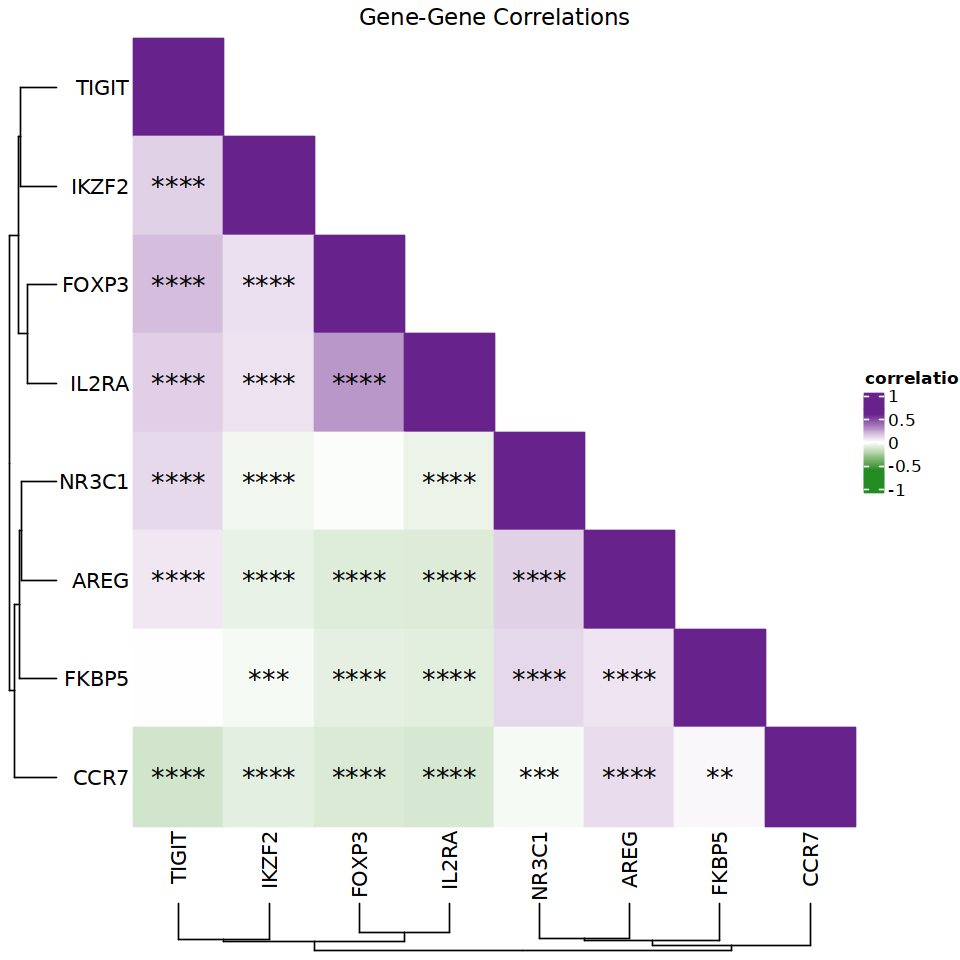

In [169]:
fig.size(8,8)
hp

In [170]:
pdf(file = paste(saving.path, "Figures/Fig4D.GGcorrelation.halfHM.pdf", sep = ''),
    width = 6, 
    height = 6)
hp
dev.off()

pdf 
  2

In [77]:
cor_sig <- as.matrix(cor_p)
cor_sig[cor_p < 0.0001] <- "****"
cor_sig[cor_p >= 0.0001 &cor_p < 0.001] <- "***"
cor_sig[cor_p >= 0.001 &cor_p < 0.01] <- "**"
cor_sig[cor_p >= 0.01 & cor_p <= 0.05] <- "*"
cor_sig[cor_p > 0.05] <- ""
cor_sig
cor_p

AREG NR3C1 IL2RA CCR7 FKBP5 FOXP3 TIGIT IKZF2
AREG       ****  ****  **** ****  ****  ****  **** 
NR3C1 ****       ****  ***  ****        ****  **** 
IL2RA **** ****        **** ****  ****  ****  **** 
CCR7  **** ***   ****       **    ****  ****  **** 
FKBP5 **** ****  ****  **         ****        ***  
FOXP3 ****       ****  **** ****        ****  **** 
TIGIT **** ****  ****  ****       ****        **** 
IKZF2 **** ****  ****  **** ***   ****  ****

AREG NR3C1        IL2RA        CCR7         FKBP5        FOXP3     
AREG  1    0.000000e+00 0.000000e+00 0.0000000000 0.0000000000 0.00000000
NR3C1 0    1.000000e+00 4.662937e-15 0.0003491944 0.0000000000 0.09182983
IL2RA 0    4.662937e-15 1.000000e+00 0.0000000000 0.0000000000 0.00000000
CCR7  0    3.491944e-04 0.000000e+00 1.0000000000 0.0050794583 0.00000000
FKBP5 0    0.000000e+00 0.000000e+00 0.0050794583 1.0000000000 0.00000000
FOXP3 0    9.182983e-02 0.000000e+00 0.0000000000 0.0000000000 1.00000000
TIGIT 0    0.000000e+00 0.000000e+00 0.0000000000 0.7701148190 0.00000000
IKZF2 0    1.679530e-07 0.000000e+00 0.0000000000 0.0001032465 0.00000000
      TIGIT     IKZF2       
AREG  0.0000000 0.000000e+00
NR3C1 0.0000000 1.679530e-07
IL2RA 0.0000000 0.000000e+00
CCR7  0.0000000 0.000000e+00
FKBP5 0.7701148 1.032465e-04
FOXP3 0.0000000 0.000000e+00
TIGIT 1.0000000 0.000000e+00
IKZF2 0.0000000 1.000000e+00

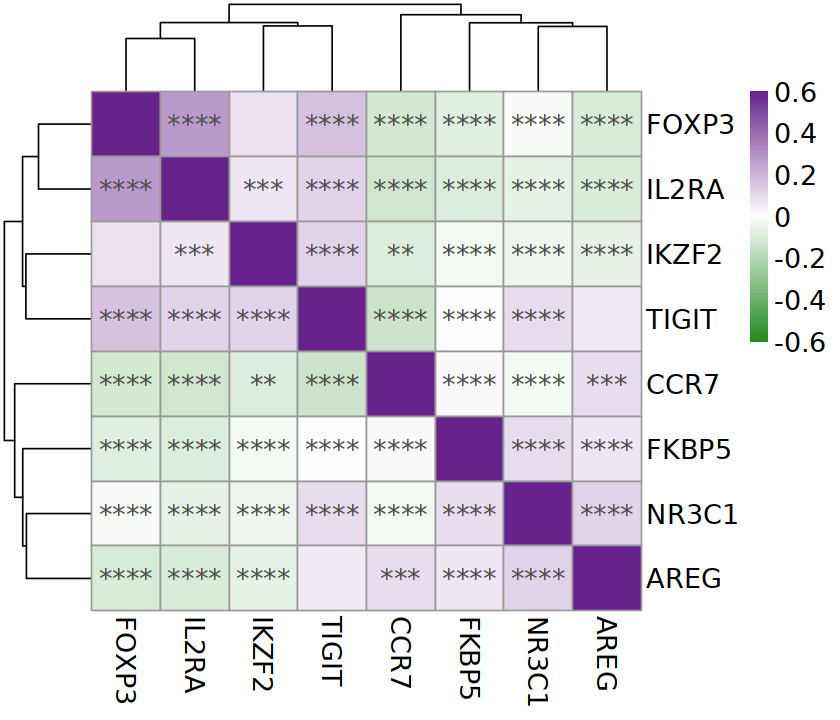

In [166]:
fig.size(6,7)
colorBreaks_cor = seq(-0.6,0.6,length=100)
# palette_cor <- colorRampPalette(c("blue", "white", "red"))(n = length(colorBreaks_cor))
palette_cor <- colorRampPalette(c("forestgreen", "white","darkorchid4" ))(n = length(colorBreaks_cor))

pheatmap(cor_mat, display_numbers = cor_sig, breaks = colorBreaks_cor, color = palette_cor, 
         fontsize = 16, fontsize_number = 16, font_color = "black")
pheatmap(cor_mat, display_numbers = cor_sig, breaks = colorBreaks_cor, color = palette_cor, 
         fontsize = 16, fontsize_number = 16, font_color = "black",
         filename = paste(saving.path, "Figures/Fig4D.GGcorrelation.pdf", sep = ''))

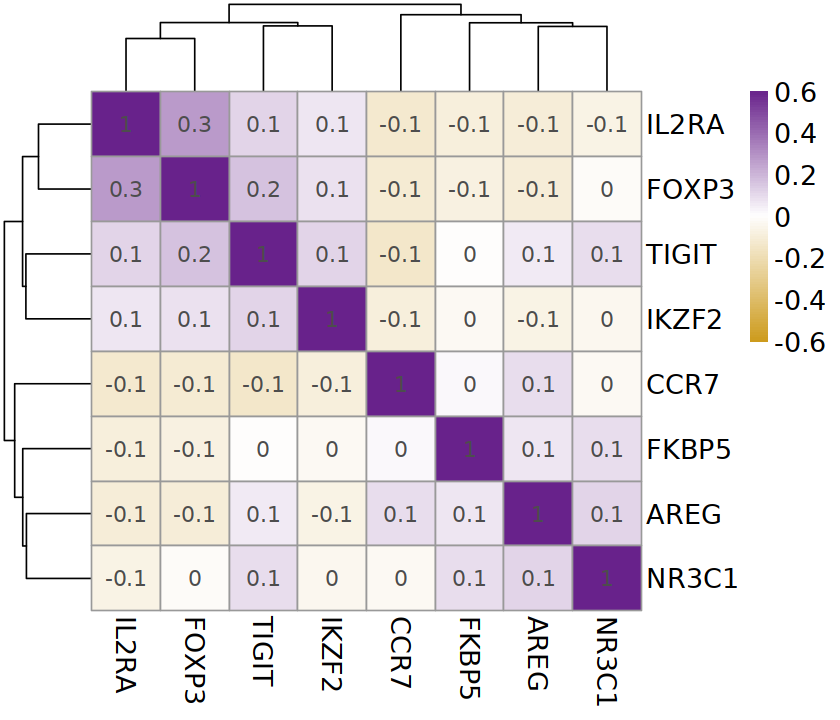

In [44]:
fig.size(6,7)
colorBreaks_cor = seq(-0.6,0.6,length=100)
# palette_cor <- colorRampPalette(c("blue", "white", "red"))(n = length(colorBreaks_cor))
palette_cor <- colorRampPalette(c("goldenrod3", "white", "darkorchid4"))(n = length(colorBreaks_cor))

pheatmap(cor.plot, breaks = colorBreaks_cor, color = palette_cor, 
         display_numbers = round(cor.plot, 1), fontsize = 16)

pheatmap(cor.plot, breaks = colorBreaks_cor, color = palette_cor, 
         display_numbers = round(cor.plot, 1), fontsize = 16)




## Figure 5

In [9]:
corrHM <- readRDS(paste(saving.path, "Figures/Fig5A.correlationHM.dat.rds", sep = ''))

NULL

NULL

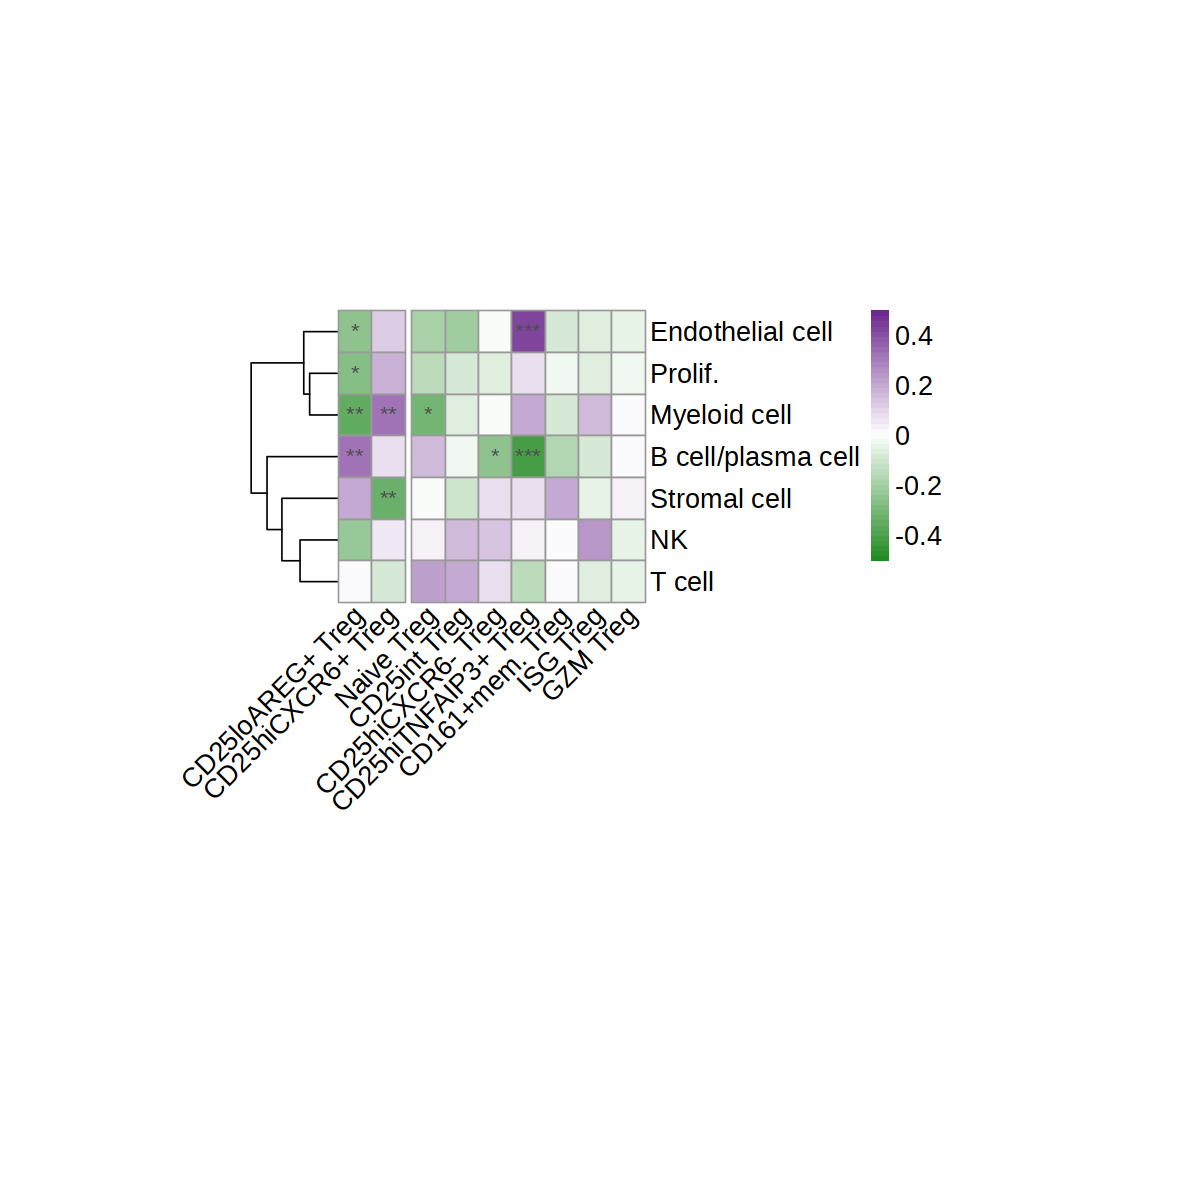

In [10]:
fig.size(8,8)

draw_colnames_45 <- function (coln, gaps, ...) {
    coord <- pheatmap:::find_coordinates(length(coln), gaps)
    x     <- coord$coord - 0.5 * coord$size
    res   <- grid::textGrob(
      coln, x = x, y = unit(1, "npc") - unit(3,"bigpts"),
      vjust = 0.75, hjust = 1, rot = 45, gp = grid::gpar(...)
    )
    return(res)
}
assignInNamespace(
  x = "draw_colnames",
  value = "draw_colnames_45",
  ns = asNamespace("pheatmap")
)


colorBreaks_cor = seq(-0.5,0.5,length=50)
# palette_cor <- RColorBrewer:::brewer.pal(11,"RdYlGn")[-1]
palette_cor <- colorRampPalette(c("forestgreen", "white","darkorchid4"))(n = length(colorBreaks_cor))


fig.size(10,10)


pheatmap(corrHM$corr, scale = "none", cluster_cols = F, cluster_rows = T,  show_colnames = T, display_numbers = corrHM$sig,
         cellheight=25, cellwidth=20,gaps_col = c(2), 
         breaks = colorBreaks_cor, color = palette_cor,fontsize = 16) + 
theme(plot.margin = margin(l = 10))

pheatmap(corrHM$corr, scale = "none", cluster_cols = F, cluster_rows = T,  show_colnames = T, display_numbers = corrHM$sig,
         cellheight=25,cellwidth=20,gaps_col = c(2), 
         breaks = colorBreaks_cor, color = palette_cor,fontsize = 16, filename = paste(saving.path, "Figures/Fig5A.correlationHM.pdf", sep = '')) + 
theme(plot.margin = margin(l = 10))


### CNA CTAP

In [11]:
# CTAP F
cna.CTAP.F <- readRDS(paste0(saving.path,"CNA_CTAP_F.RDS"))

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


pdf 
  2

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


pdf 
  2

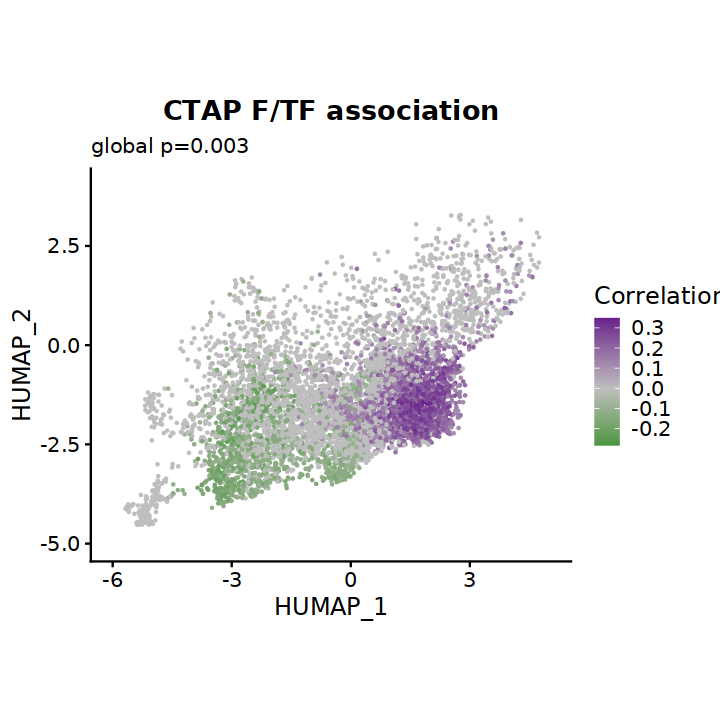

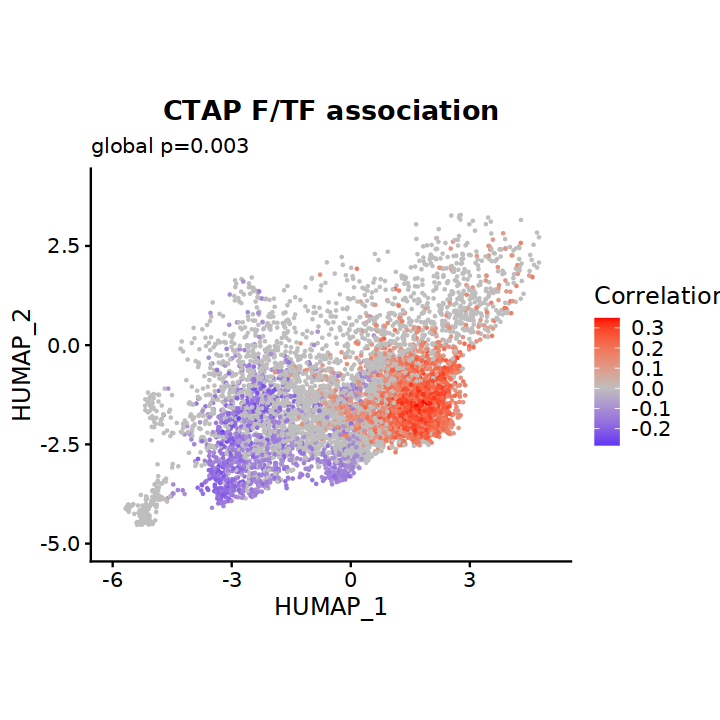

In [165]:
fig.size(6,6)

pdf(file = paste(saving.path, "Figures/Fig5C.CTAP_CNA_F.pinkgreen.pdf", sep = ''),
    width = 6, 
    height = 6)
gp <- FeaturePlot(cna.CTAP.F, features = c('cna_ncorrs_fdr10'))[[1]] + 
    scale_colour_gradient2(low = "forestgreen", mid = "grey", high = "darkorchid4", midpoint = 0) +
    labs(title = 'CTAP F/TF association', subtitle = sprintf('global p=%0.3f', cna.CTAP.F@reductions$cna@misc$p),  color = 'Correlation') + 
    coord_fixed()
gp
dev.off()
gp

# "goldenrod3", "white", "darkorchid4"
pdf(file = paste(saving.path, "Figures/Fig5C.CTAP_CNA_F.redblue.pdf", sep = ''),
    width = 6, 
    height = 6)
gp <- FeaturePlot(cna.CTAP.F, features = c('cna_ncorrs_fdr10'))[[1]] + 
    scale_colour_gradient2(low = "Blue", mid = "grey", high = "Red", midpoint = 0) +
    labs(title = 'CTAP F/TF association', subtitle = sprintf('global p=%0.3f', cna.CTAP.F@reductions$cna@misc$p),  color = 'Correlation') + 
    coord_fixed()
gp
dev.off()
gp



In [146]:
# CTAP M
cna.CTAP.M <- readRDS(paste0(saving.path,"CNA.CTAP.M.RDS"))

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


pdf 
  2

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


pdf 
  2

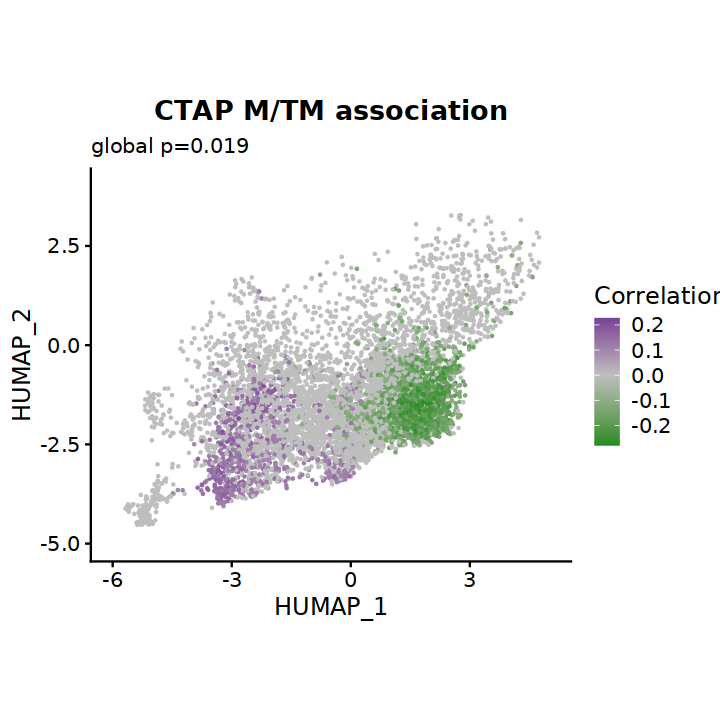

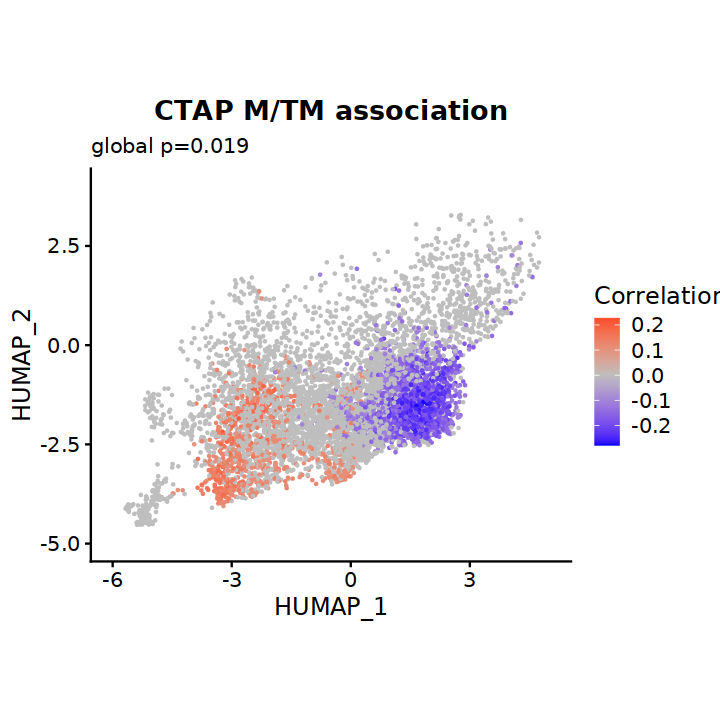

In [162]:
fig.size(6,6)

pdf(file = paste(saving.path, "Figures/Fig5C.CTAP_CNA_M.pinkgreen.pdf", sep = ''),
    width = 6, 
    height = 6)
gp <- FeaturePlot(cna.CTAP.M, features = c('cna_ncorrs_fdr10'))[[1]] + 
    scale_colour_gradient2(low = "forestgreen", mid = "grey", high = "darkorchid4", midpoint = 0) +
    labs(title = 'CTAP M/TM association', subtitle = sprintf('global p=%0.3f', cna.CTAP.M@reductions$cna@misc$p),  color = 'Correlation') + 
    coord_fixed()
gp
dev.off()
gp


pdf(file = paste(saving.path, "Figures/Fig5C.CTAP_CNA_M.redblue.pdf", sep = ''),
    width = 6, 
    height = 6)
gp <- FeaturePlot(cna.CTAP.M, features = c('cna_ncorrs_fdr10'))[[1]] + 
    scale_colour_gradient2(low = "Blue", mid = "grey", high = "Red", midpoint = 0) +
    labs(title = 'CTAP M/TM association', subtitle = sprintf('global p=%0.3f', cna.CTAP.M@reductions$cna@misc$p),  color = 'Correlation') + 
    coord_fixed()
gp
dev.off()
gp

# fig.size(6,6)

# pdf(file = paste(saving.path, "Figures/Fig5C.CTAP_CNA_M.pdf", sep = ''),
#     width = 6, 
#     height = 6)
# gp <- FeaturePlot(cna.CTAP.M, features = c('cna_ncorrs_fdr10'))[[1]] + 
#     scale_colour_gradient2(low = "Blue", mid = "grey", high = "Red", midpoint = 0) +
#     labs(title = 'CTAP CTAP M/TM association', subtitle = 'Filtered for FDR<0.10', color = 'Correlation') +
#     coord_fixed()
# gp
# dev.off()
# gp


# pdf(file = paste(saving.path, "Figures/Fig5C.CTAP_CNA_M_global.pdf", sep = ''),
#     width = 6, 
#     height = 6)
# gp <- FeaturePlot(cna.CTAP.M, features = c('cna_ncorrs'))[[1]] + 
#     scale_colour_gradient2(low = "Blue", mid = "grey", high = "Red", midpoint = 0) +
#     labs(title = 'CTAP M/TM association', 
#     subtitle = sprintf('global p=%0.3f', cna.CTAP.M@reductions$cna@misc$p), 
#          color = 'Correlation') + 
#     coord_fixed()
# gp
# dev.off()
# gp

## Extended Data Figure 1

In [23]:
amp <- readRDS("/data/brennerlab/Shani/projects/AMP_Phase_2/AMP2_Tcells_Seurat.rds")

In [26]:
amp@meta.data %>% names()%>% unique()

[1] "orig.ident"       "nCount_RNA"       "nFeature_RNA"     "sample"          
 [5] "cluster"          "cell_type"        "donor"            "fibro"           
 [9] "Tfilter"          "nUMI"             "nGene"            "percent_mito"    
[13] "Tfilter2"         "cluster_number"   "cluster_name"     "nCount_ADT"      
[17] "nFeature_ADT"     "age"              "sex"              "treatment"       
[21] "CDAI"             "disease.duration" "tissue.type"      "krenn"           
[25] "subject_id"       "CTAP"

### Extended 1a

png 
  2

png 
  2

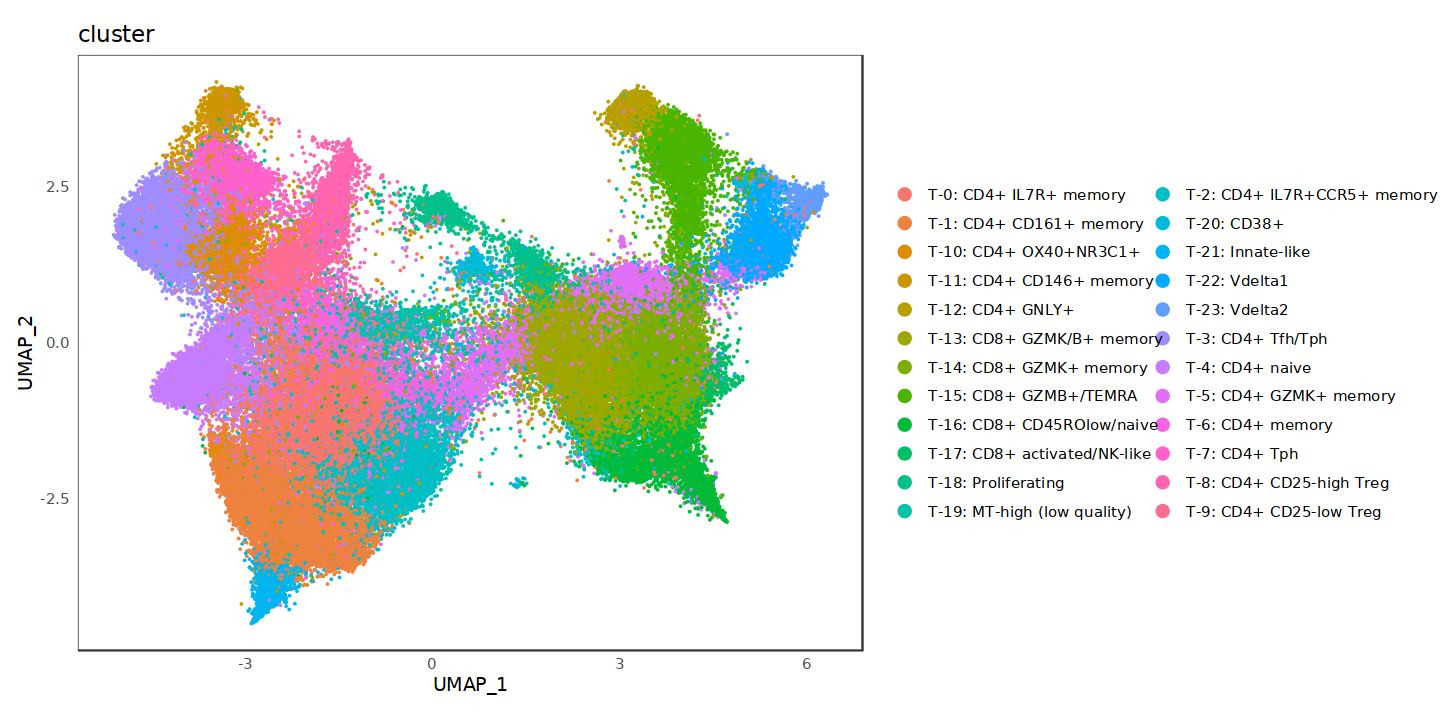

In [54]:
fig.size(6,12)
p <- DimPlot(amp, reduction = "umap", group.by = "cluster") +#, raster = T, 
             # pt.size =2,
             # raster.dpi = c(500, 500)) + 
coord_fixed() + theme_bw() + 
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         axis.ticks.x=element_blank(),  axis.ticks.y=element_blank()) 

p

pdf(file = paste(saving.path, "Figures/FigS1a.AMP2_Tcell.UMAP.pdf", sep = ''),
    width = 14, 
    height = 8)
p
dev.off()


png(file = paste(saving.path, "Figures/FigS1a.AMP2_Tcell.UMAP.png", sep = ''), 
   width = 1000, height = 600)
p
dev.off()


# fig.size(8,20)
# p <- ggplot(ampdat, aes(x=UMAP_1, y = UMAP_2, color = cluster)) + 
# geom_point() + coord_fixed() +
# theme_bw(base_size = 20) +
# theme(panel.border = element_blank(), panel.background = element_blank(), 
#       axis.line.x.bottom = element_blank(),
#       axis.line.y.left   = element_blank())

# p
# rasterize(p, dpi = 300)

### Extended 1b

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


png 
  2

png 
  2

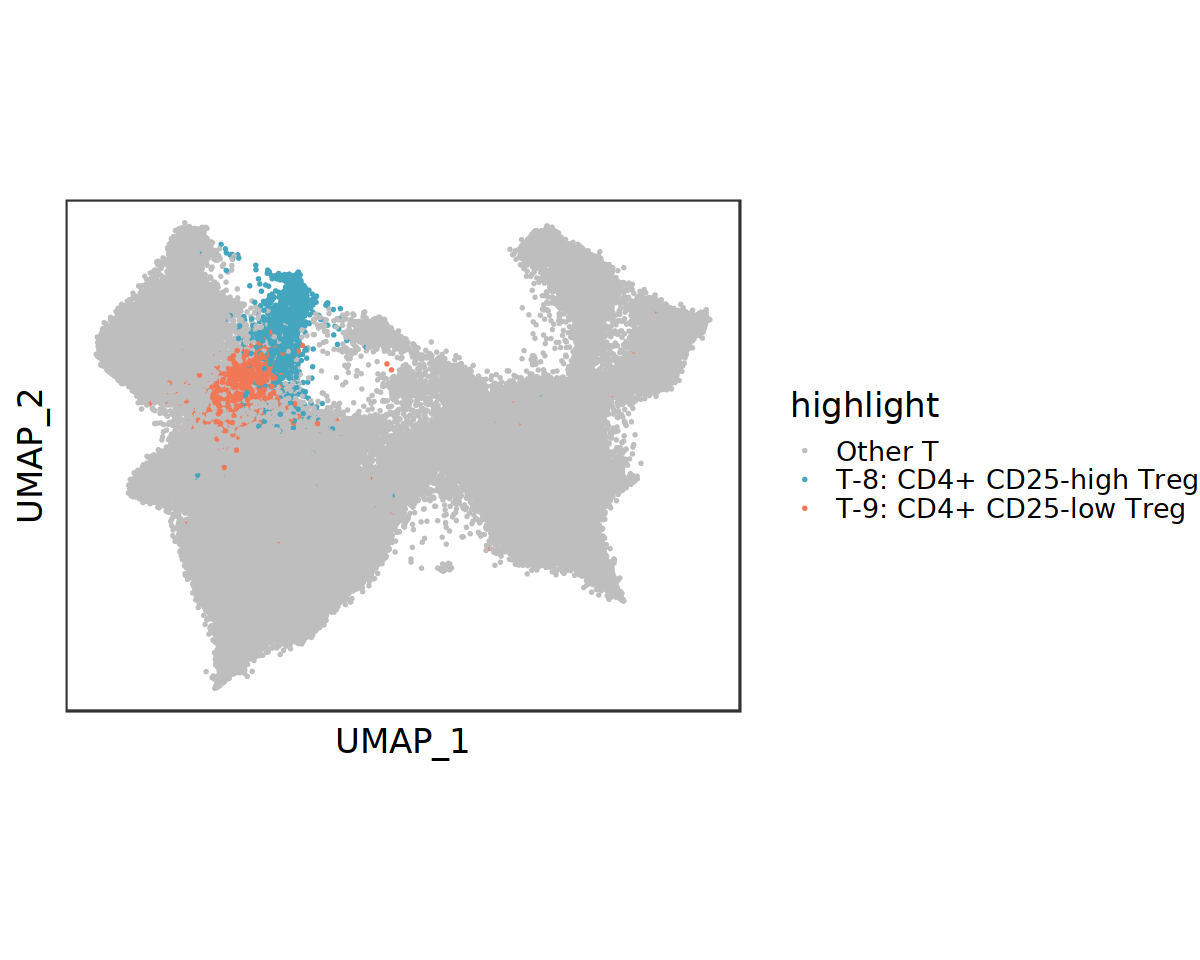

In [53]:
fig.size(8,10)
ampdat <- amp@reductions$umap@cell.embeddings %>% data.frame%>% mutate(cluster = amp$cluster) %>% 
mutate(highlight = if_else(grepl("Treg", cluster), cluster, "Other T"))

p <- ggplot(ampdat, aes(x=UMAP_1, y = UMAP_2, color = highlight)) + geom_point(size =0.5) + 
scale_color_manual(values = c("grey", "#43A5BE", "#F07857")) + 
theme_bw(base_size = 20)+ coord_fixed() +
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         axis.text.x=element_blank(), axis.ticks.x=element_blank(), axis.text.y=element_blank(), axis.ticks.y=element_blank()) + coord_fixed()
p

pdf(file = paste(saving.path, "Figures/FigS1b.AMP2_Tcell.UMAP.pdf", sep = ''),
    width = 10, 
    height = 8)
p
dev.off()


png(file = paste(saving.path, "Figures/FigS1b.AMP2_Tcell.UMAP.png", sep = ''), 
   width = 800, height = 600)
p
dev.off()

# fig.size(8,20)
# ggplot(ampdat, aes(x=UMAP_1, y = UMAP_2, color = cluster)) + geom_point(size =0.5) + coord_fixed() +
# theme_bw(base_size = 20)

png 
  2

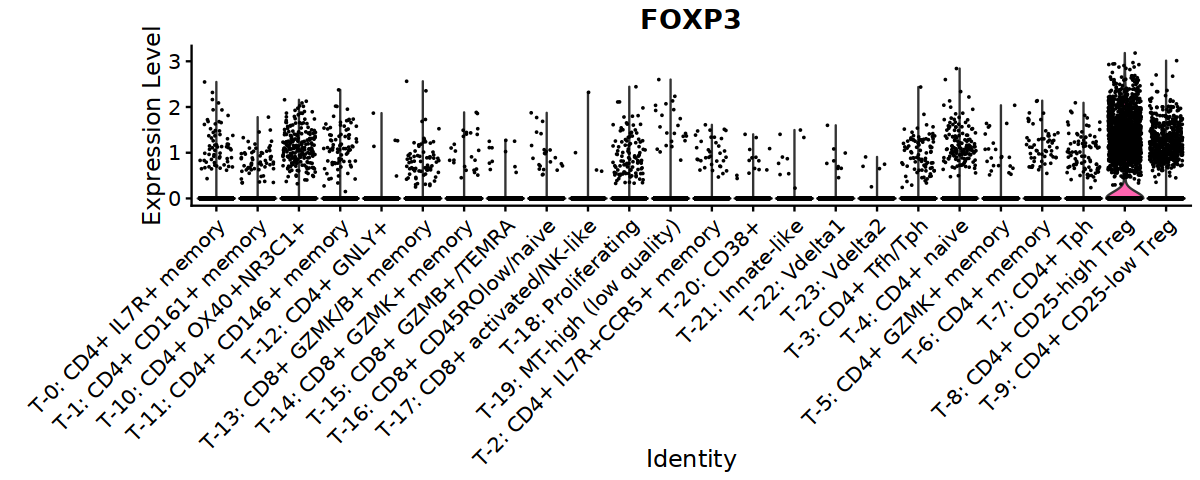

In [63]:
fig.size(4, 10)
v <- VlnPlot(amp, "FOXP3", group.by = "cluster", pt.size = 0.0000001) + 
theme(legend.position = "None", plot.margin = margin(l=80))

v

pdf(file = paste(saving.path, "Figures/FigS1b.FOXP3.Vln.pdf", sep = ''),
    width = 10, 
    height = 4)
v
dev.off()

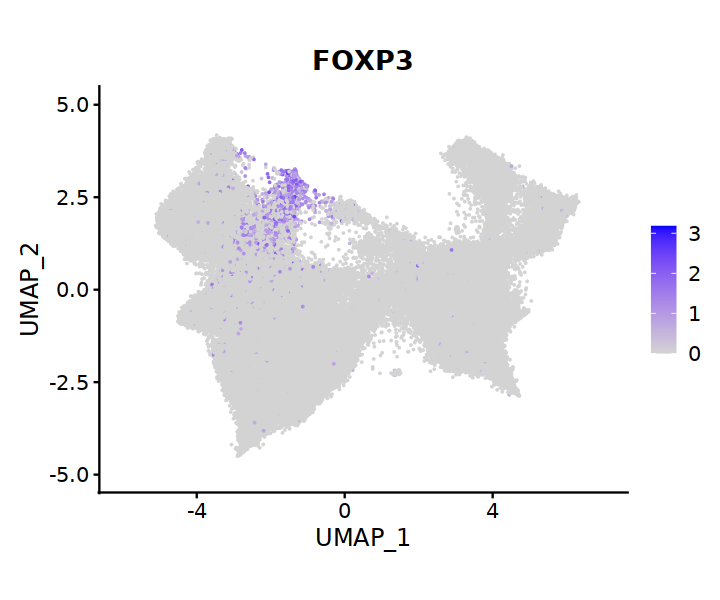

In [84]:
fig.size(5,6)
FeaturePlot(amp, features = c("FOXP3")) + coord_fixed()

ggsave(paste(saving.path, "Figures/FigS1b.FOXP3.umap.png", sep = ''), 
       width=6, height=5, dpi=300)

ggsave(paste(saving.path, "Figures/FigS1b.FOXP3.umap.pdf", sep = ''), 
       width=6, height=5, dpi=300)


# png(file = paste(saving.path, "Figures/FigS1b.FOXP3.umap.png", sep = ''), pointsize = 6,
#    width = 800, height = 400, res = 1200)
# p
# dev.off()

In [ ]:
exp.dat <- amp@meta.data[, c("cluster","donor")]%>% filter(grepl("CD4\\+", cluster))%>% 
    mutate(Treg = ifelse(grepl("Treg", cluster), "Treg", "Other CD4+T"))%>% 
    group_by(donor,Treg) %>% summarize(n = n())%>% ungroup(donor, Treg)

# exp.dat
fig.size(5,10)
p <- ggplot(exp.dat, aes(x=donor, y=n, fill=Treg)) + theme_bw(base_size = 20) + theme(axis.ticks.x=element_blank(),axis.text.x=element_blank())
p + geom_bar(stat="identity")
p <- p + geom_bar(stat="identity", position = "fill")
p
# p + geom_hline(yintercept=0.01)



## Supplementary Table 1

In [30]:
deg <- read.csv(paste0(saving.path, "integrated.Tregs.prestoResults.Full.effects.csv"))

In [31]:
deg %>% head

X contrast      feature beta      sigma     zscore     pvalue      
1 1 Proliferating MALAT1  -1.366420 0.1300661 -10.505576 8.142436e-26
2 2 Proliferating HMGN2    1.196297 0.1182116  10.119961 4.505935e-24
3 3 ISG high Treg MX1      2.084549 0.2087079   9.987878 1.722300e-23
4 4 ISG high Treg EIF2AK2  1.649300 0.1680797   9.812603 9.937185e-23
5 5 ISG high Treg ISG15    2.044559 0.2105205   9.711922 2.682309e-22
6 6 ISG high Treg IFIT1    3.275786 0.3495811   9.370604 7.211867e-21
  cluster       logFC     SD        fdr         
1 Proliferating -1.971327 0.1876458 2.077624e-20
2 Proliferating  1.725892 0.1705433 5.748672e-19
3 ISG high Treg  3.007368 0.3011018 1.464873e-18
4 ISG high Treg  2.379437 0.2424878 6.338930e-18
5 ISG high Treg  2.949675 0.3037169 1.368836e-17
6 ISG high Treg  4.725960 0.5043389 2.680216e-16

In [32]:
deg$contrast[deg$contrast == "Proliferating"] <-  "Prolif."
deg$contrast[deg$contrast == "Naive Treg - TCF7/CCR7"] <-  "Naive Treg"
deg$contrast[deg$contrast == "CD25-intermediate Treg"] <-  "CD25int Treg"
deg$contrast[deg$contrast == "CD25-high Treg"] <-  "CD25hiCXCR6- Treg"
deg$contrast[deg$contrast == "CD25-high CXCR6+ Treg"] <-  "CD25hiCXCR6+ Treg"
deg$contrast[deg$contrast == "AREG Treg"] <-  "CD25loAREG+ Treg"
deg$contrast[deg$contrast == "TNFa response Treg"] <-  "CD25hiTNFAIP3+ Treg"
deg$contrast[deg$contrast == "CD161+ memory Treg"] <-  "CD161+mem. Treg"
deg$contrast[deg$contrast == "ISG high Treg"] <-  "ISG Treg"
deg$contrast[deg$contrast == "GZM+ Treg"] <-  "GZM Treg"

deg$contrast <- factor(deg$contrast, levels = ordered.levels)


In [33]:
deg <- deg %>% filter(zscore > 0 & pvalue < 0.05) %>% select(-cluster) %>% mutate(cell.state = contrast) %>% 
group_by(cell.state) %>% arrange(cell.state, desc(zscore))
deg %>% head

X    contrast   feature beta      sigma      zscore   pvalue       logFC    
1 2414 Naive Treg RPS24   0.1520300 0.04125403 3.685215 0.0002285094 0.2193329
2 2433 Naive Treg RPS13   0.5436075 0.14808299 3.670965 0.0002416361 0.7842599
3 2467 Naive Treg RPS5    0.5158015 0.14136172 3.648806 0.0002634618 0.7441443
4 2575 Naive Treg EEF1B2  0.6358781 0.17686409 3.595292 0.0003240277 0.9173782
5 2630 Naive Treg PABPC1  0.4289935 0.12020322 3.568902 0.0003584810 0.6189067
6 2635 Naive Treg RPS12   0.6316053 0.17710707 3.566234 0.0003621480 0.9112138
  SD         fdr        cell.state
1 0.05951699 0.02415347 Naive Treg
2 0.21363860 0.02534150 Naive Treg
3 0.20394185 0.02724966 Naive Treg
4 0.25516095 0.03210832 Naive Treg
5 0.17341659 0.03477947 Naive Treg
6 0.25551149 0.03506857 Naive Treg

In [35]:
dim(deg)

[1] 6644   11

In [36]:
write.csv(deg, paste0(saving.path, "PResto.Results.Filtered.4Publication.csv"))

In [296]:
# library(magick)
library("pdftools")

Using poppler version 22.12.0



In [299]:
panel.ul <- image_read_pdf(paste(saving.path, "Figures/BK_Figures/Fig3B_ ICOS+ in CXCR6+TReg.pdf", sep = ''))
panel.ul